# Notebook : Fitting autocovariances with or without taking into account a stationary component

Here we compare two models used to fit Eulerian and Lagrangian autocovariances. The first model considers a decay of the internal tides signal toward zero, the other take into account a stationary part of internal tides as we expect autocovariance envelope to decrease toward a threshold created by the stationary part.

The goal is to compare results with both models and choose the best model depending on these results.

In the first part we compare estimation of parameters in the fit for both versions. In the a second part, we compare fit to theoretical model for Lagrangian autocovariances.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from glob import glob
import os
from matplotlib.lines import Line2D




In [2]:
path = '/Users/zcaspar/codes/Diagnostics2/'


In [3]:
dsv1 = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_param_fit_T80.nc'))] #local
dsv2 = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_param_fit_T80_v2_b*'))] #local
#dsv2 = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_param_fit_T80_v2.nc'))] #local

### Models used in fit : 
$v_1$: Internal tides are assumed nonstationary (autocovariances assumed decreasing toward zero)

C = $\widetilde{V}e^{-\tau/\widetilde{T}}cos(\omega\tau)$

$v_2$: A stationary part is taken into account; autocovariance decreases toward a sort of threshold possibly different from zero if the stationary amplitude if internal tides remains significant.

C = $(\widetilde{V}_s+\widetilde{V}_{ns}e^{-\tau/\widetilde{T}})cos(\omega\tau)$



In [4]:
# Definition functions : 

def C_fit_v1(tau,Tt,Xt):
    return Xt*np.cos(omega*tau)*np.exp(-tau/Tt)
def C_fit_v2(tau,Tt,Xt_ns,Xt_s):
    return np.cos(omega*tau)*(Xt_s+Xt_ns*np.exp(-tau/Tt))

In [5]:
# Definition of timelags and tides frequency
tau = np.arange(0,40,10/(24*60))
omega = 2*np.pi*2
Tau = xr.DataArray(tau,dims='tau',coords={'tau':tau})

In [6]:
# Parameters used in plots
cl,ce='firebrick','c'
lims = [(0,60),(0,40),(0,0.1),(0,0.2),(-0.01,0.35)]
titles = [r'$\widetilde{T}$',r'$\overline{T}$',r'$\widetilde{X}$',r'$\overline{X}$',r'$\Omega$']
i=-2

### Stationary and nonstationary velocity amplitudes in both version for one simulation ($S_3$)

Text(0.5, 0.98, 'Amplitudes from autocovariances of v')

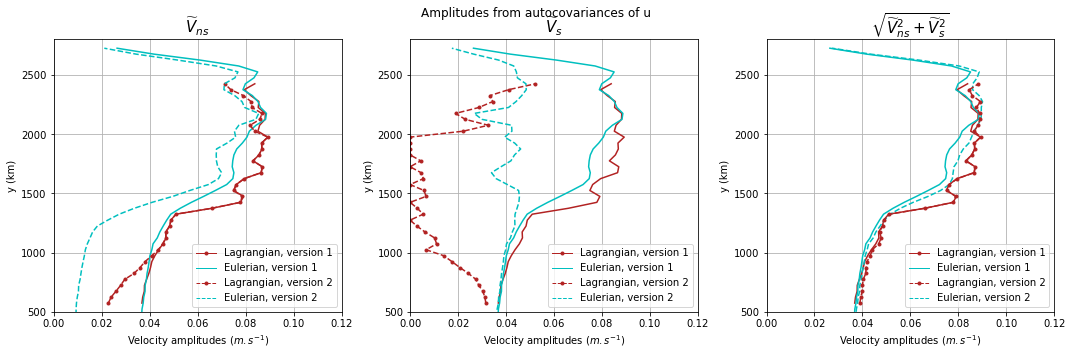

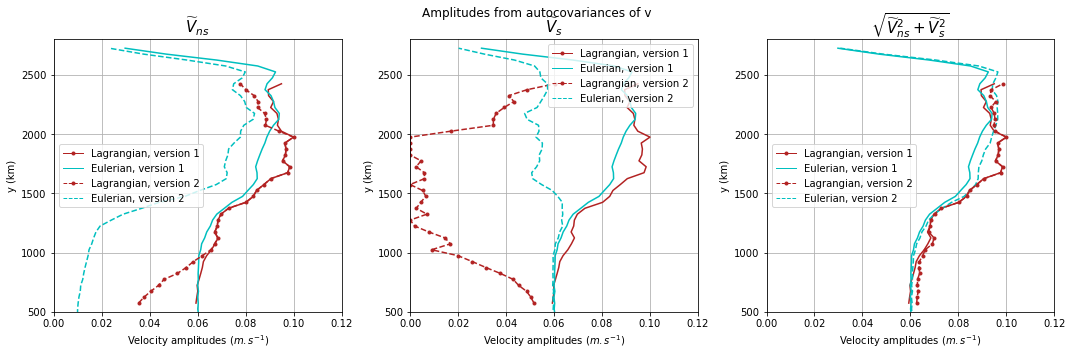

In [7]:

fig,axes = plt.subplots(1,3,figsize=(15,5))
for pa,lim,ax in zip(['Xt_ns','Xt_s'],lims[2:4],axes[:-1]):
    
    np.sqrt(dsv1[i]['L_u_avg'].sel(param='Xtilde')).plot(y='ybin',c=cl,ax=ax)
    np.sqrt(dsv1[i]['E_u_avg'].sel(param='Xtilde')/2).plot(y='ybin',c=ce,ax=ax)
    np.sqrt(dsv2[i]['L_u_avg'].sel(param=pa)).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='--')
    np.sqrt(dsv2[i]['E_u_avg'].sel(param=pa)/2).plot(y='ybin',c=ce,ax=ax,linestyle='--')
    
np.sqrt(dsv1[i]['L_u_avg'].sel(param='Xtilde')).plot(y='ybin',c=cl,ax=axes[2])
np.sqrt(dsv1[i]['E_u_avg'].sel(param='Xtilde')/2).plot(y='ybin',c=ce,ax=axes[2])
(np.sqrt(dsv2[i]['E_u_avg'].sel(param='Xt_ns')/2+dsv2[i]['E_u_avg'].sel(param='Xt_s')/2)).plot(y='ybin',c=ce,ax=axes[2],linestyle='--')
(np.sqrt(dsv2[i]['L_u_avg'].sel(param='Xt_ns')+dsv2[i]['L_u_avg'].sel(param='Xt_s'))).plot(y='ybin',c=cl,ax=axes[2],marker='.',linestyle='--')
for ax,title in zip(axes,[r'$\widetilde{V}_{ns}$',r'$\widetilde{V}_{s}$',r'$\sqrt{\widetilde{V}_{ns}^2+\widetilde{V}_{s}^2}$']):
    labels = [r'Lagrangian, version 1','Eulerian, version 1','Lagrangian, version 2','Eulerian, version 2']

    custom_lines = [Line2D([0], [0], color=cl, lw=1,marker='.'),
                    Line2D([0], [0], color=ce, lw=1),
                    Line2D([0], [0], color=cl, lw=1,marker='.',linestyle='--'),
                           Line2D([0], [0], color=ce, lw=1,linestyle='--')]
    
    ax.set_ylim(500,2800);ax.set_xlim(0,0.12);ax.set_xlabel('')
    ax.legend(custom_lines[:], labels[:]);ax.grid();ax.set_title(title,fontsize=15)
    ax.set_xlabel(r'Velocity amplitudes ($m.s^{-1}$)');ax.set_ylabel('y (km)')
fig.tight_layout();fig.suptitle('Amplitudes from autocovariances of u')

#fig.savefig('/Users/zcaspar/Documents/Figures/Fit_V1vsV2/Vt_u_wp7.pdf')

fig,axes = plt.subplots(1,3,figsize=(15,5))
for pa,lim,ax in zip(['Xt_ns','Xt_s'],lims[2:4],axes[:-1]):
    
    np.sqrt(dsv1[i]['L_v_avg'].sel(param='Xtilde')).plot(y='ybin',c=cl,ax=ax)
    np.sqrt(dsv1[i]['E_v_avg'].sel(param='Xtilde')/2).plot(y='ybin',c=ce,ax=ax)
    np.sqrt(dsv2[i]['L_v_avg'].sel(param=pa)).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='--')
    np.sqrt(dsv2[i]['E_v_avg'].sel(param=pa)/2).plot(y='ybin',c=ce,ax=ax,linestyle='--')
    
np.sqrt(dsv1[i]['L_v_avg'].sel(param='Xtilde')).plot(y='ybin',c=cl,ax=axes[2])
np.sqrt(dsv1[i]['E_v_avg'].sel(param='Xtilde')/2).plot(y='ybin',c=ce,ax=axes[2])
(np.sqrt(dsv2[i]['E_v_avg'].sel(param='Xt_ns')/2+dsv2[i]['E_v_avg'].sel(param='Xt_s')/2)).plot(y='ybin',c=ce,ax=axes[2],linestyle='--')
(np.sqrt(dsv2[i]['L_v_avg'].sel(param='Xt_ns')+dsv2[i]['L_v_avg'].sel(param='Xt_s'))).plot(y='ybin',c=cl,ax=axes[2],marker='.',linestyle='--')
for ax,title in zip(axes,[r'$\widetilde{V}_{ns}$',r'$\widetilde{V}_{s}$',r'$\sqrt{\widetilde{V}_{ns}^2+\widetilde{V}_{s}^2}$']):
    labels = [r'Lagrangian, version 1','Eulerian, version 1','Lagrangian, version 2','Eulerian, version 2']

    custom_lines = [Line2D([0], [0], color=cl, lw=1,marker='.'),
                    Line2D([0], [0], color=ce, lw=1),
                    Line2D([0], [0], color=cl, lw=1,marker='.',linestyle='--'),
                           Line2D([0], [0], color=ce, lw=1,linestyle='--')]
    
    ax.set_ylim(500,2800);ax.set_xlim(0,0.12);ax.set_xlabel('')
    ax.legend(custom_lines[:], labels[:]);ax.grid();ax.set_title(title,fontsize=15)
    ax.set_xlabel(r'Velocity amplitudes ($m.s^{-1}$)');ax.set_ylabel('y (km)')
fig.tight_layout();fig.suptitle('Amplitudes from autocovariances of v')
#fig.savefig('/Users/zcaspar/Documents/Figures/Fit_V1vsV2/Vt_v_wp7.pdf')

### Comments : 

The total amplitude (right column) are similar in both versions meaning we are in both cases to estimate similarly the internal tides velocity amplitude.

In Lagrangian most of the amplitude is estimated as a nonstationary amplitude in version 2 with values of $\tilde V_{ns}$ similar to the value of amplitude in version 1 in the center of the domain. This is consistent with an apparent non-stationarity in Lagrangian perspective. The stationary amplitude is significant in regions far from the jet, north and south (same order of amplitude than $\tilde V_{ns}$.

Eulerian amplitudes are mostly stationary in the south, $\tilde V_s\sim\tilde V$. Nonstationary amplitude becomes dominant in the jet and remains so in the north (loss of stationarity, stratification bump and Coriolis).

### Decorrelation timescales in both version for one simulation ($S_3$)

Text(0.5, 0.98, 'Timescales from autocovariances of v')

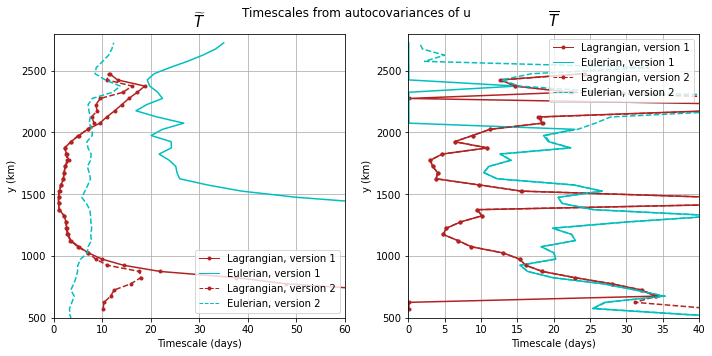

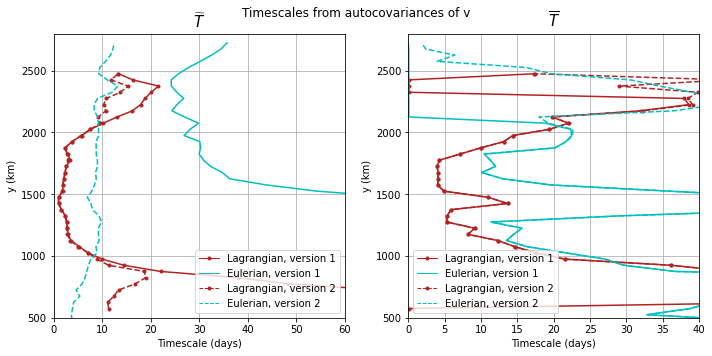

In [9]:
#wp7 : 


fig,axes = plt.subplots(1,2,figsize=(10,5))
for pa,title,lim,ax in zip(['Tt','Tb'],titles[:2],lims[:2],axes):
    labels = [r'Lagrangian, version 1','Eulerian, version 1','Lagrangian, version 2','Eulerian, version 2']

    custom_lines = [Line2D([0], [0], color=cl, lw=1,marker='.'),
                    Line2D([0], [0], color=ce, lw=1),
                    Line2D([0], [0], color=cl, lw=1,marker='.',linestyle='--'),
                           Line2D([0], [0], color=ce, lw=1,linestyle='--')]
    dsv1[i]['L_u_avg'].sel(param=pa).plot(y='ybin',c=cl,ax=ax,marker='.')#,label=r'Lagrangian $\widetilde{'+pa[0]+'}_u$')
    dsv1[i]['E_u_avg'].sel(param=pa).plot(y='ybin',c=ce,ax=ax)
    dsv2[i]['L_u_avg'].sel(param=pa).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='--')#,label=r'Lagrangian $\widetilde{'+pa[0]+'}_u$')
    dsv2[i]['E_u_avg'].sel(param=pa).plot(y='ybin',c=ce,ax=ax,linestyle='--')
    #,label=r'Eulerian $\widetilde{'+pa[0]+'}_u$')
     #   d['L_v_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax,marker='+')#,label=r'Lagrangian $\widetilde{'+pa[0]+'}_v$')
     #   d['E_v_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax)#,label=r'Eulerian $\widetilde{'+pa[0]+'}_v$')
    ax.set_ylim(500,2800);ax.set_xlim(lim);ax.set_xlabel('')
    ax.legend(custom_lines, labels);ax.grid();ax.set_title(title,fontsize=15)
    ax.set_xlabel('Timescale (days)');ax.set_ylabel('y (km)')
fig.tight_layout();fig.suptitle('Timescales from autocovariances of u')
#fig.savefig('/Users/zcaspar/Documents/Figures/Fit_V1vsV2/T_u_wp7.pdf')

fig,axes = plt.subplots(1,2,figsize=(10,5))
for pa,title,lim,ax in zip(['Tt','Tb'],titles[:2],lims[:2],axes):
    labels = [r'Lagrangian, version 1','Eulerian, version 1','Lagrangian, version 2','Eulerian, version 2']

    custom_lines = [Line2D([0], [0], color=cl, lw=1,marker='.'),
                    Line2D([0], [0], color=ce, lw=1),
                    Line2D([0], [0], color=cl, lw=1,marker='.',linestyle='--'),
                           Line2D([0], [0], color=ce, lw=1,linestyle='--')]
    dsv1[i]['L_v_avg'].sel(param=pa).plot(y='ybin',c=cl,ax=ax,marker='.')#,label=r'Lagrangian $\widetilde{'+pa[0]+'}_u$')
    dsv1[i]['E_v_avg'].sel(param=pa).plot(y='ybin',c=ce,ax=ax)
    dsv2[i]['L_v_avg'].sel(param=pa).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='--')#,label=r'Lagrangian $\widetilde{'+pa[0]+'}_u$')
    dsv2[i]['E_v_avg'].sel(param=pa).plot(y='ybin',c=ce,ax=ax,linestyle='--')
    #,label=r'Eulerian $\widetilde{'+pa[0]+'}_u$')
     #   d['L_v_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax,marker='+')#,label=r'Lagrangian $\widetilde{'+pa[0]+'}_v$')
     #   d['E_v_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax)#,label=r'Eulerian $\widetilde{'+pa[0]+'}_v$')
    ax.set_ylim(500,2800);ax.set_xlim(lim);ax.set_xlabel('')
    ax.legend(custom_lines, labels);ax.grid();ax.set_title(title,fontsize=15)
    ax.set_xlabel('Timescale (days)');ax.set_ylabel('y (km)')
fig.tight_layout();fig.suptitle('Timescales from autocovariances of v')
#fig.savefig('/Users/zcaspar/Documents/Figures/Fit_V1vsV2/T_v_wp7.pdf')

### Comments : 

Good news, the change of version does not seem to have an impact on the decorrelation timescale of the slow motion, meaning our fitting method is able to separate effects of both motions correctly, at least for the area from south to $\sim$2000km. For latitudes larger than 2000km we find differences with Eulerian timescale closer to Lagrangian one in version 2 compared to version 1. Eulerian $\bar T$ is larger in north in version 2 which more consistent with what is expected in the area since slow motion is eaher there.

Lagrangian nonstationarity timescales are similarin both versions between approwimatly 1000 and 2000 km whic corresponds to the area where the nonstationary amplitude in version equivalent to the one in version 1. Outside this area timescales ares shorter in version 2.
Eulerian timescales differ more significantly with values around 10 days where the nonstationary amplitude is significant in version 2. In the contrary, in version 1, nonstationary timescales were very large in the south to get closer to a stationary-like state, increase rapidly in the jet and reach values around 20-30 days in the north.

We see here that the version 1 overestimate nonstationarity timescales as it tries and fit fast oscillations that do not decrease toward zero but toward a constant. In that quite energetic case, version 2 seems more accurate and the estimating suppllementary parameters is worth it.

### Eulerian and Lagrangian amlpitudes and timescales for all simulations : 

In [7]:
number = len(dsv1)
cmap_Ta = plt.get_cmap('Greys')
cmap = plt.get_cmap('YlOrBr')
colors_Ta = [cmap_Ta(i) for i in np.linspace(0.5, 1, number)]
colors = [cmap(i) for i in np.linspace(0.2, 1, number)]
custom_lines = [
                Line2D([0], [0], color=cmap(.6), lw=1),
                Line2D([0], [0], color=cmap(.6), lw=1,marker='.')
                ]


Text(0.5, 0.98, 'Version 1, u')

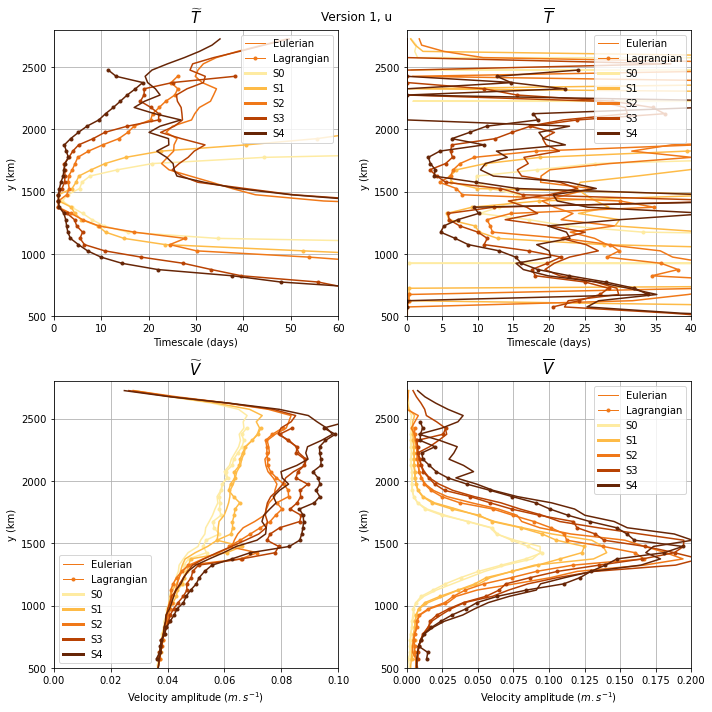

In [11]:
ce,cl = 'lightseagreen','firebrick'
lims = [(0,60),(0,40),(0,0.1),(0,0.2),(-0.01,0.35)]

titles = [r'$\widetilde{T}$',r'$\overline{T}$',r'$\widetilde{V}$',r'$\overline{V}$',r'$\Omega$']


fig,axes = plt.subplots(2,2,figsize=(10,10))
for pa,title,lim, ax in zip(['Tt','Tb'],titles[:2],lims[:2],axes[0,:]):
    labels = ['Eulerian','Lagrangian']
    cmap = plt.get_cmap('YlOrBr')
    custom_lines = [
                    Line2D([0], [0], color=cmap(.6), lw=1),
                    Line2D([0], [0], color=cmap(.6), lw=1,marker='.')
                    ]
    for i,d in enumerate(dsv1):
        d['L_u_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax,marker='.',label=r'Lagrangian')#,label=r'Lagrangian $\widetilde{'+pa[0]+'}_u$')
        d['E_u_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax,label=r'Eulerian')#,label=r'Eulerian $\widetilde{'+pa[0]+'}_u$')
        custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
        labels.append('S%s'% i)
     #   d['L_v_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax,marker='+')#,label=r'Lagrangian $\widetilde{'+pa[0]+'}_v$')
     #   d['E_v_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax)#,label=r'Eulerian $\widetilde{'+pa[0]+'}_v$')
    ax.set_ylim(500,2800);ax.set_xlim(lim);ax.set_xlabel('')
    ax.legend(custom_lines, labels);ax.grid();ax.set_title(title,fontsize=15)
    ax.set_xlabel('Timescale (days)');ax.set_ylabel('y (km)')
for pa,title,lim,ax in zip(['Xtilde','Xbar'],titles[2:],lims[2:],axes[1,:]):
    labels = ['Eulerian','Lagrangian']
    cmap = plt.get_cmap('YlOrBr')
    custom_lines = [
                    Line2D([0], [0], color=cmap(.6), lw=1),
                    Line2D([0], [0], color=cmap(.6), lw=1,marker='.')
                    ]
    for i,d in enumerate(dsv1):
        if i!=3:
            (np.sqrt(d['L_u_avg'].sel(param=pa))).plot(y='ybin',c=colors[i],ax=ax,marker='.')
            (np.sqrt(d['E_u_avg'].sel(param=pa))).plot(y='ybin', c=colors[i],ax=ax)
        else:
            (np.sqrt(d['L_u_avg'].sel(param=pa))).plot(y='ybin',c=colors[i],ax=ax,marker='.',label=r'Lagrangian')
            (np.sqrt(d['E_u_avg'].sel(param=pa)/2)).plot(y='ybin', c=colors[i],ax=ax,label=r'Eulerian')

        custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
        labels.append('S%s'% i)
    ax.set_ylim(500,2800);ax.set_xlim(lim);ax.set_xlabel(r'Velocity amplitude ($m.s^{-1}$)')
    ax.legend(custom_lines,labels);ax.grid();ax.set_title(title,fontsize=15);ax.set_ylabel('y (km)')
fig.tight_layout();fig.suptitle('Version 1, u')
#fig.savefig('/Users/zcaspar/Documents/Figures/Fit_V1vsV2/params_u_V1.pdf')

### Comments : 
Amplitudes : 

$\tilde V$ : Eulerian smaller than Lagrangian, the difference increases with jet's strength.
$\bar V$ : Similar values in both perspectives, Eulerian values slightly larger.

Timescales : 

$\tilde T$ : 
Eulerian : high values in the south and in all domain for $S_0$ and $S_1$, stationary waves.
Decrease rapidly in the jet, 20-30 days in the north

Lagrangian : high values in the south, decreases in the jet (minima around 1 day in the center), increase up to 10-20 days in the north

$\bar T$ : very noisy south and north, around 10 days in Lagrangian framework and 20 days in Eulerian one

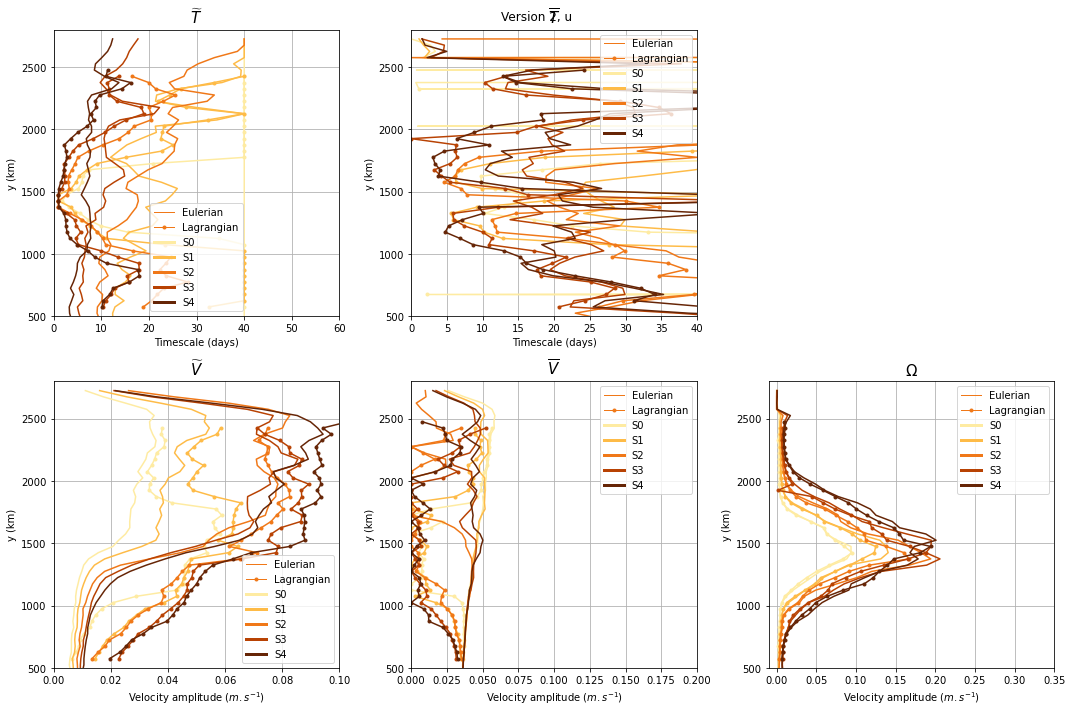

In [12]:

fig,axes = plt.subplots(2,3,figsize=(15,10))
for pa,title,lim,ax in zip(['Tt','Tb'],titles[:2],lims[:2],axes[0,:]):
    labels = ['Eulerian','Lagrangian']
    cmap = plt.get_cmap('YlOrBr')
    custom_lines = [
                    Line2D([0], [0], color=cmap(.6), lw=1),
                    Line2D([0], [0], color=cmap(.6), lw=1,marker='.')
                    ]
    for i,d in enumerate(dsv2):
        d['L_u_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax,marker='.',label=r'Lagrangian')#,label=r'Lagrangian $\widetilde{'+pa[0]+'}_u$')
        d['E_u_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax,label=r'Eulerian')#,label=r'Eulerian $\widetilde{'+pa[0]+'}_u$')
        custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
        labels.append('S%s'% i)
     #   d['L_v_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax,marker='+')#,label=r'Lagrangian $\widetilde{'+pa[0]+'}_v$')
     #   d['E_v_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax)#,label=r'Eulerian $\widetilde{'+pa[0]+'}_v$')
    ax.set_ylim(500,2800);ax.set_xlim(lim);ax.set_xlabel('')
    ax.legend(custom_lines, labels);ax.grid();ax.set_title(title,fontsize=15)
    ax.set_xlabel('Timescale (days)');ax.set_ylabel('y (km)')
for pa,title,lim,ax in zip(['Xt_ns','Xt_s','Xb'],titles[2:],lims[2:],axes[1,:]):
    labels = ['Eulerian','Lagrangian']
    cmap = plt.get_cmap('YlOrBr')
    custom_lines = [
                    Line2D([0], [0], color=cmap(.6), lw=1),
                    Line2D([0], [0], color=cmap(.6), lw=1,marker='.')
                    ]
    for i,d in enumerate(dsv2):
        if i!=3:
            (np.sqrt(d['L_u_avg'].sel(param=pa))).plot(y='ybin',c=colors[i],ax=ax,marker='.')
            (np.sqrt(d['E_u_avg'].sel(param=pa))).plot(y='ybin', c=colors[i],ax=ax)
        else:
            (np.sqrt(d['L_u_avg'].sel(param=pa))).plot(y='ybin',c=colors[i],ax=ax,marker='.',label=r'Lagrangian')
            (np.sqrt(d['E_u_avg'].sel(param=pa)/2)).plot(y='ybin', c=colors[i],ax=ax,label=r'Eulerian')

        custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
        labels.append('S%s'% i)
    ax.set_ylim(500,2800);ax.set_xlim(lim);ax.set_xlabel(r'Velocity amplitude ($m.s^{-1}$)')
    ax.legend(custom_lines,labels);ax.grid();ax.set_title(title,fontsize=15);ax.set_ylabel('y (km)')
fig.tight_layout();fig.suptitle('Version 2, u')
fig.delaxes(axes[0,2])
#fig.savefig('/Users/zcaspar/Documents/Figures/Fit_V1vsV2/params_u_V2.pdf')

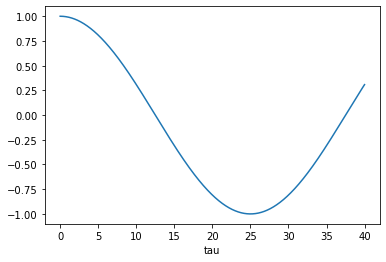

In [15]:
np.cos(2*np.pi*0.02*Tau).plot()

### Comments : 
Amplitudes : 

$\tilde V_s$ : Eulerian dominant in south and in all domain for $S_0$ and $S_1$, consistent with nonstationary timescales very large in version 1.
$\bar V$ : Similar values in both perspectives, Eulerian values slightly larger.

Timescales : 

$\tilde T$ : 
Eulerian : high values in the south and in all domain for $S_0$ and $S_1$, stationary waves.
Decrease rapidly in the jet, 20-30 days in the north

Lagrangian : high values in the south, decreases in the jet (minima around 1 day in the center), increase up to 10-20 days in the north

$\bar T$ : very noisy south and north, around 10 days in Lagrangian framework and 20 days in Eulerian one

Text(0.5, 0.98, 'Version 1, u')

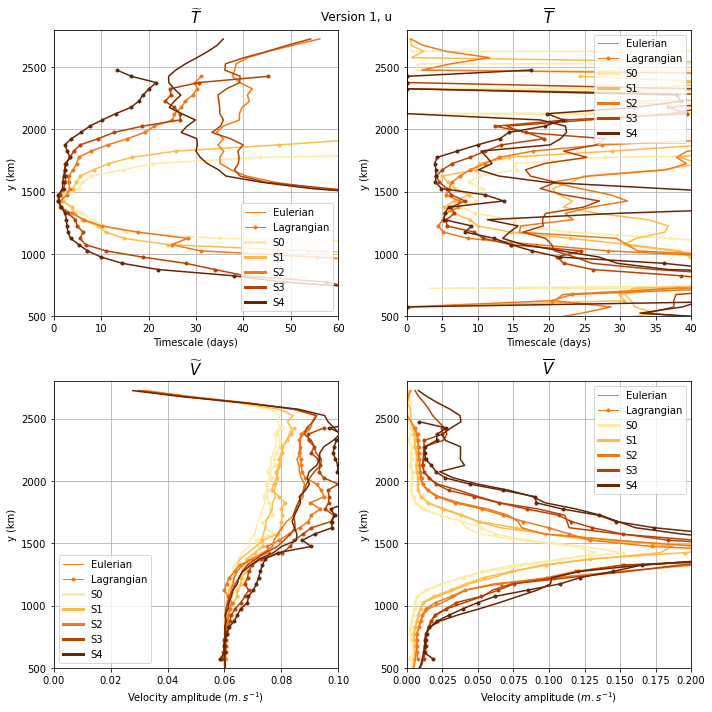

In [13]:

titles = [r'$\widetilde{T}$',r'$\overline{T}$',r'$\widetilde{V}$',r'$\overline{V}$',r'$\Omega$']


fig,axes = plt.subplots(2,2,figsize=(10,10))
for pa,title,lim,ax in zip(['Tt','Tb'],titles[:2],lims[:2],axes[0,:]):
    labels = ['Eulerian','Lagrangian']
    cmap = plt.get_cmap('YlOrBr')
    custom_lines = [
                    Line2D([0], [0], color=cmap(.6), lw=1),
                    Line2D([0], [0], color=cmap(.6), lw=1,marker='.')
                    ]
    for i,d in enumerate(dsv1):
        d['L_v_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax,marker='.',label=r'Lagrangian')#,label=r'Lagrangian $\widetilde{'+pa[0]+'}_u$')
        d['E_v_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax,label=r'Eulerian')#,label=r'Eulerian $\widetilde{'+pa[0]+'}_u$')
        custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
        labels.append('S%s'% i)
     #   d['L_v_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax,marker='+')#,label=r'Lagrangian $\widetilde{'+pa[0]+'}_v$')
     #   d['E_v_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax)#,label=r'Eulerian $\widetilde{'+pa[0]+'}_v$')
    ax.set_ylim(500,2800);ax.set_xlim(lim);ax.set_xlabel('')
    ax.legend(custom_lines, labels);ax.grid();ax.set_title(title,fontsize=15)
    ax.set_xlabel('Timescale (days)');ax.set_ylabel('y (km)')
for pa,title,lim,ax in zip(['Xtilde','Xbar'],titles[2:],lims[2:],axes[1,:]):
    labels = ['Eulerian','Lagrangian']
    cmap = plt.get_cmap('YlOrBr')
    custom_lines = [
                    Line2D([0], [0], color=cmap(.6), lw=1),
                    Line2D([0], [0], color=cmap(.6), lw=1,marker='.')
                    ]
    for i,d in enumerate(dsv1):
        if i!=3:
            (np.sqrt(d['L_v_avg'].sel(param=pa))).plot(y='ybin',c=colors[i],ax=ax,marker='.')
            (np.sqrt(d['E_v_avg'].sel(param=pa))).plot(y='ybin', c=colors[i],ax=ax)
        else:
            (np.sqrt(d['L_v_avg'].sel(param=pa))).plot(y='ybin',c=colors[i],ax=ax,marker='.',label=r'Lagrangian')
            (np.sqrt(d['E_v_avg'].sel(param=pa)/2)).plot(y='ybin', c=colors[i],ax=ax,label=r'Eulerian')

        custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
        labels.append('S%s'% i)
    ax.set_ylim(500,2800);ax.set_xlim(lim);ax.set_xlabel(r'Velocity amplitude ($m.s^{-1}$)')
    ax.legend(custom_lines,labels);ax.grid();ax.set_title(title,fontsize=15);ax.set_ylabel('y (km)')
fig.tight_layout();fig.suptitle('Version 1, u')
#fig.savefig('/Users/zcaspar/Documents/Figures/Fit_V1vsV2/params_v_V1.pdf')

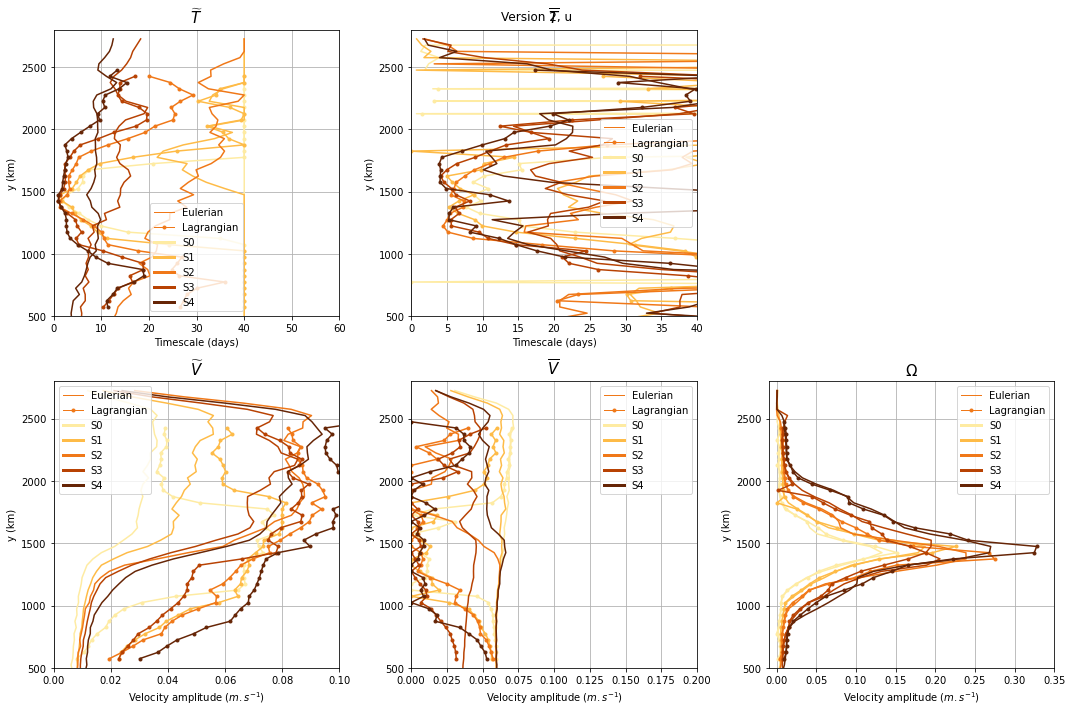

In [14]:
fig,axes = plt.subplots(2,3,figsize=(15,10))
for pa,title,lim,ax in zip(['Tt','Tb'],titles[:2],lims[:2],axes[0,:]):
    labels = ['Eulerian','Lagrangian']
    cmap = plt.get_cmap('YlOrBr')
    custom_lines = [
                    Line2D([0], [0], color=cmap(.6), lw=1),
                    Line2D([0], [0], color=cmap(.6), lw=1,marker='.')
                    ]
    for i,d in enumerate(dsv2):
        d['L_v_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax,marker='.',label=r'Lagrangian')#,label=r'Lagrangian $\widetilde{'+pa[0]+'}_u$')
        d['E_v_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax,label=r'Eulerian')#,label=r'Eulerian $\widetilde{'+pa[0]+'}_u$')
        custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
        labels.append('S%s'% i)
     #   d['L_v_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax,marker='+')#,label=r'Lagrangian $\widetilde{'+pa[0]+'}_v$')
     #   d['E_v_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax)#,label=r'Eulerian $\widetilde{'+pa[0]+'}_v$')
    ax.set_ylim(500,2800);ax.set_xlim(lim);ax.set_xlabel('')
    ax.legend(custom_lines, labels);ax.grid();ax.set_title(title,fontsize=15)
    ax.set_xlabel('Timescale (days)');ax.set_ylabel('y (km)')
for pa,title,lim,ax in zip(['Xt_ns','Xt_s','Xb'],titles[2:],lims[2:],axes[1,:]):
    labels = ['Eulerian','Lagrangian']
    cmap = plt.get_cmap('YlOrBr')
    custom_lines = [
                    Line2D([0], [0], color=cmap(.6), lw=1),
                    Line2D([0], [0], color=cmap(.6), lw=1,marker='.')
                    ]
    for i,d in enumerate(dsv2):
        if i!=3:
            (np.sqrt(d['L_v_avg'].sel(param=pa))).plot(y='ybin',c=colors[i],ax=ax,marker='.')
            (np.sqrt(d['E_v_avg'].sel(param=pa))).plot(y='ybin', c=colors[i],ax=ax)
        else:
            (np.sqrt(d['L_u_avg'].sel(param=pa))).plot(y='ybin',c=colors[i],ax=ax,marker='.',label=r'Lagrangian')
            (np.sqrt(d['E_u_avg'].sel(param=pa)/2)).plot(y='ybin', c=colors[i],ax=ax,label=r'Eulerian')

        custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
        labels.append('S%s'% i)
    ax.set_ylim(500,2800);ax.set_xlim(lim);ax.set_xlabel(r'Velocity amplitude ($m.s^{-1}$)')
    ax.legend(custom_lines,labels);ax.grid();ax.set_title(title,fontsize=15);ax.set_ylabel('y (km)')
fig.tight_layout();fig.suptitle('Version 2, u')
fig.delaxes(axes[0,2])
#fig.savefig('/Users/zcaspar/Documents/Figures/Fit_V1vsV2/params_v_V2.pdf')

### Total velocity amplitudes in both version for all simulation

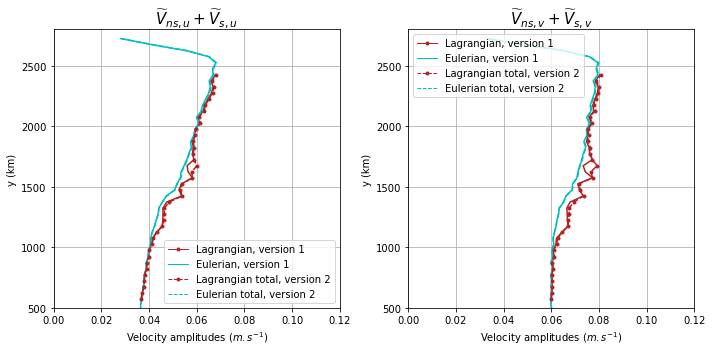

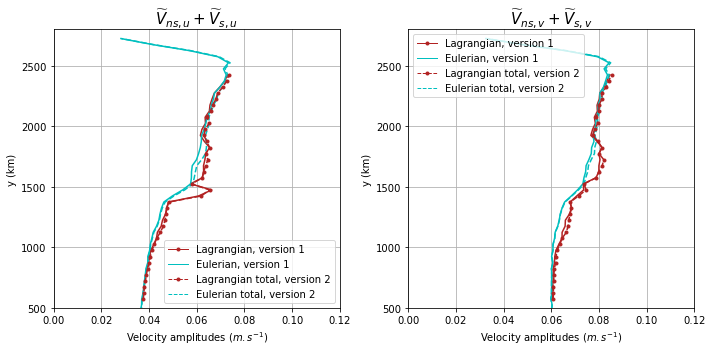

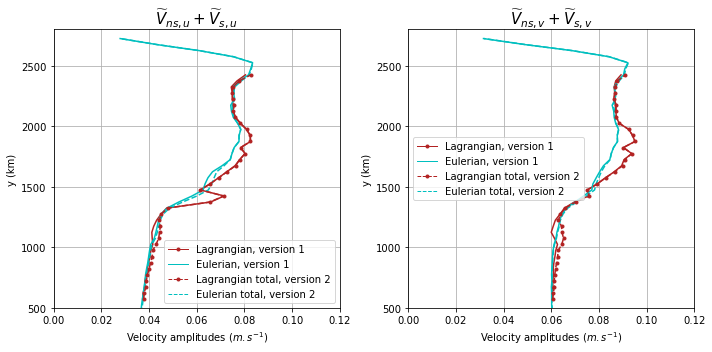

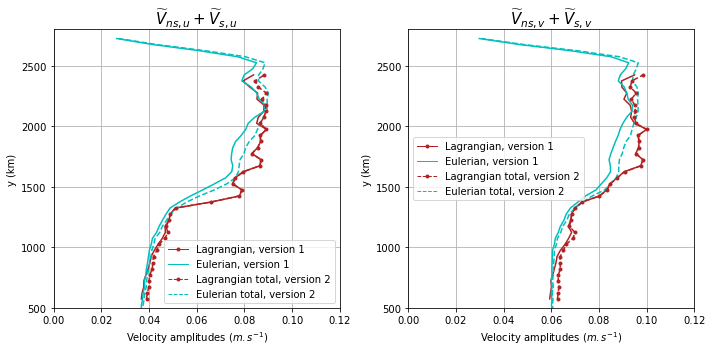

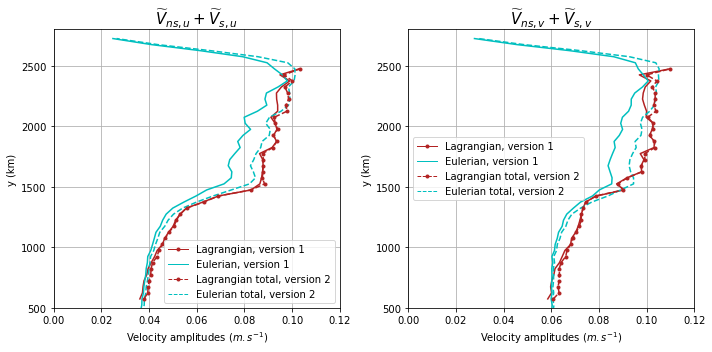

In [8]:
for i in range(5):
    fig,axes = plt.subplots(1,2,figsize=(10,5))
    for pa,title,lim,ax in zip(['_u_avg','_v_avg'],[r'$\widetilde{V}_{ns,u}+\widetilde{V}_{s,u}$',r'$\widetilde{V}_{ns,v}+\widetilde{V}_{s,v}$'],lims[2:4],axes):
        labels = [r'Lagrangian, version 1','Eulerian, version 1','Lagrangian total, version 2','Eulerian total, version 2']

        custom_lines = [Line2D([0], [0], color=cl, lw=1,marker='.'),
                        Line2D([0], [0], color=ce, lw=1),
                        Line2D([0], [0], color=cl, lw=1,marker='.',linestyle='--'),
                               Line2D([0], [0], color=ce, lw=1,linestyle='--')]
        if i!=3:
            np.sqrt(dsv1[i]['L'+pa].sel(param='Xtilde')).plot(y='ybin',c=cl,ax=ax)
            np.sqrt(dsv1[i]['E'+pa].sel(param='Xtilde')).plot(y='ybin',c=ce,ax=ax)

            (np.sqrt(dsv2[i]['E'+pa].sel(param='Xt_ns')+dsv2[i]['E'+pa].sel(param='Xt_s'))).plot(y='ybin',c=ce,ax=ax,linestyle='--')
            (np.sqrt(dsv2[i]['L'+pa].sel(param='Xt_ns')+dsv2[i]['L'+pa].sel(param='Xt_s'))).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='--')
        else : 
            np.sqrt(dsv1[i]['L'+pa].sel(param='Xtilde')).plot(y='ybin',c=cl,ax=ax)
            np.sqrt(dsv1[i]['E'+pa].sel(param='Xtilde')/2).plot(y='ybin',c=ce,ax=ax)

            (np.sqrt(dsv2[i]['E'+pa].sel(param='Xt_ns')/2+dsv2[i]['E'+pa].sel(param='Xt_s')/2)).plot(y='ybin',c=ce,ax=ax,linestyle='--')
            (np.sqrt(dsv2[i]['L'+pa].sel(param='Xt_ns')+dsv2[i]['L'+pa].sel(param='Xt_s'))).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='--')
        ax.set_ylim(500,2800);ax.set_xlim(0,0.12);ax.set_xlabel('')
        ax.legend(custom_lines[:], labels[:]);ax.grid();ax.set_title(title,fontsize=15)
        ax.set_xlabel(r'Velocity amplitudes ($m.s^{-1}$)');ax.set_ylabel('y (km)')
    fig.tight_layout()
    #fig.savefig('/Users/zcaspar/Documents/Figures/Fit_V1vsV2/Vtot_wp%s_bis.pdf'%(i+4))

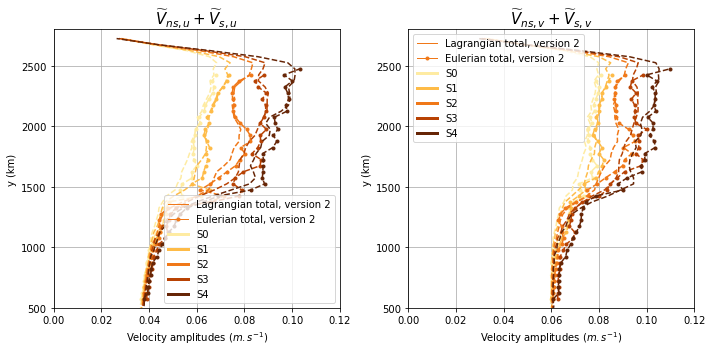

In [43]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
for pa,title,lim,ax in zip(['_u_avg','_v_avg'],[r'$\widetilde{V}_{ns,u}+\widetilde{V}_{s,u}$',r'$\widetilde{V}_{ns,v}+\widetilde{V}_{s,v}$'],lims[2:4],axes):
    labels = ['Lagrangian total, version 2','Eulerian total, version 2']

    cmap = plt.get_cmap('YlOrBr')
    custom_lines = [
                    Line2D([0], [0], color=cmap(.6), lw=1),
                    Line2D([0], [0], color=cmap(.6), lw=1,marker='.')
                    ]
    for i, d in enumerate(dsv2):
        if i!=3:
            #np.sqrt(dsv1[i]['L'+pa].sel(param='Xtilde')).plot(y='ybin',c=colors[i],ax=ax)
            #np.sqrt(dsv1[i]['E'+pa].sel(param='Xtilde')).plot(y='ybin',c=colors[i],ax=ax)

            (np.sqrt(dsv2[i]['E'+pa].sel(param='Xt_ns')+dsv2[i]['E'+pa].sel(param='Xt_s'))).plot(y='ybin',c=colors[i],ax=ax,linestyle='--')
            (np.sqrt(dsv2[i]['L'+pa].sel(param='Xt_ns')+dsv2[i]['L'+pa].sel(param='Xt_s'))).plot(y='ybin',c=colors[i],ax=ax,marker='.',linestyle='--')
            custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
            labels.append('S%s'% i)
        else : 
           # np.sqrt(dsv1[i]['L'+pa].sel(param='Xtilde')).plot(y='ybin',c=colors[i],ax=ax)
           # np.sqrt(dsv1[i]['E'+pa].sel(param='Xtilde')/2).plot(y='ybin',c=colors[i],ax=ax)

            (np.sqrt(dsv2[i]['E'+pa].sel(param='Xt_ns')/2+dsv2[i]['E'+pa].sel(param='Xt_s')/2)).plot(y='ybin',c=colors[i],ax=ax,linestyle='--')
            (np.sqrt(dsv2[i]['L'+pa].sel(param='Xt_ns')+dsv2[i]['L'+pa].sel(param='Xt_s'))).plot(y='ybin',c=colors[i],ax=ax,marker='.',linestyle='--')
            custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
            labels.append('S%s'% i)
        ax.set_ylim(500,2800);ax.set_xlim(0,0.12);ax.set_xlabel('')
        ax.legend(custom_lines[:], labels[:]);ax.grid();ax.set_title(title,fontsize=15)
        ax.set_xlabel(r'Velocity amplitudes ($m.s^{-1}$)');ax.set_ylabel('y (km)')
    fig.tight_layout()
    #fig.savefig('/Users/zcaspar/Documents/Figures/Fit_V1vsV2/Vtot_wp%s_bis.pdf'%(i+4))

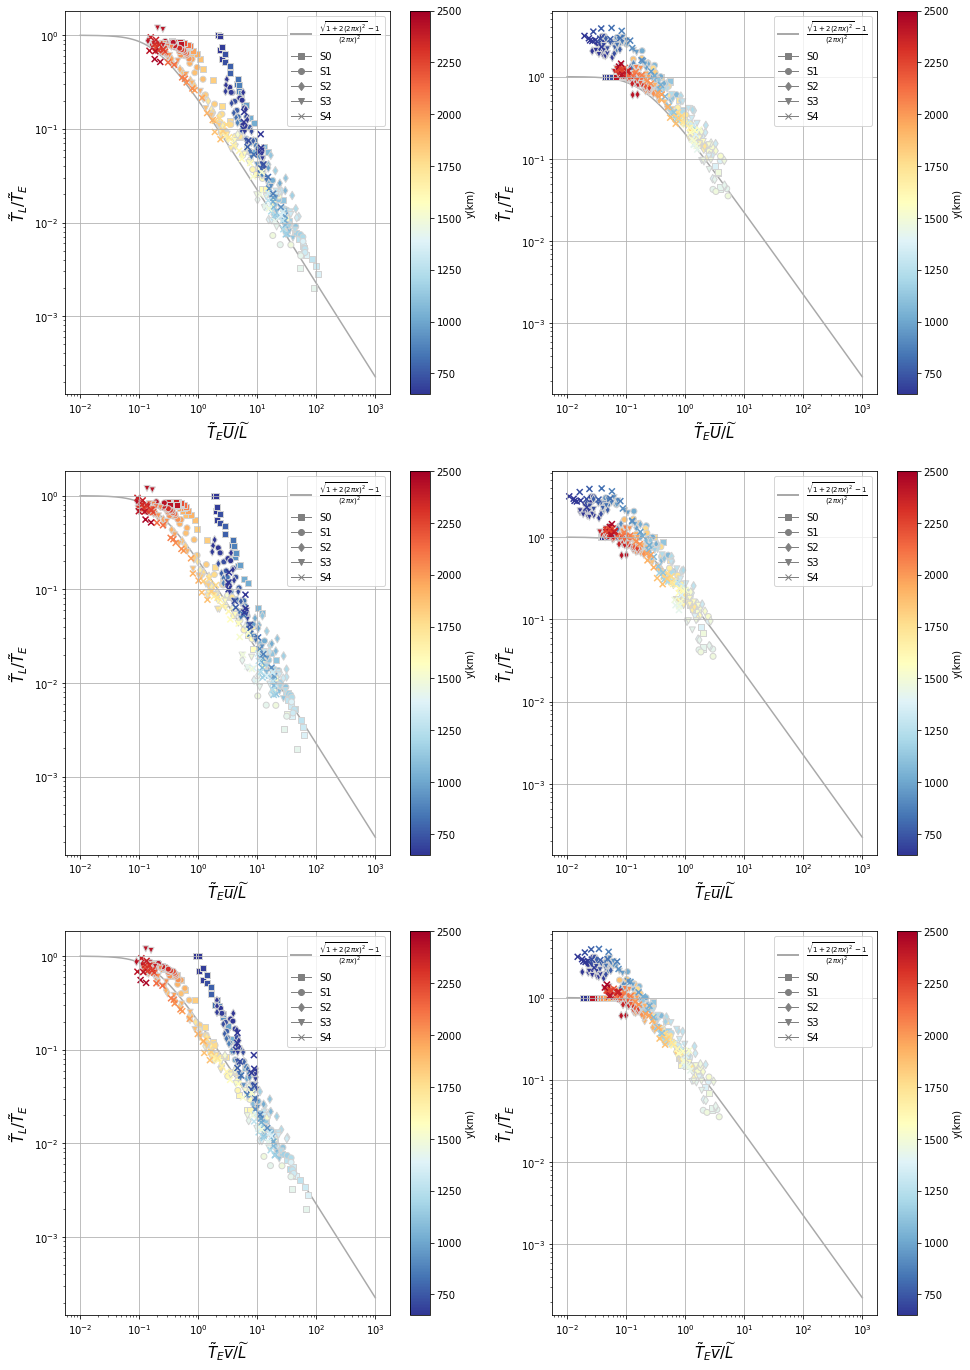

In [15]:
markers=['s','o','d','v','x']
label=[]
fontsize=15
custom_lines = [Line2D([0], [0], color='grey', lw=1,marker=m) for m in markers]


fig,axs = plt.subplots(3,2,figsize=(16,24))
for i,d,m in zip(range(len(dsv1)),dsv1,markers):
    for V in [['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]:
        x = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta'].where(d[V[0]].sel(param='Tt')<2000,drop=True)
        x1 = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta_u'].isel(s_rho=-1).where(d[V[0]].sel(param='Tt')<2000,drop=True)
        x2 = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta_v'].isel(s_rho=-1).where(d[V[0]].sel(param='Tt')<2000,drop=True)
        y = d[V[1]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        c = x.ybin.values
        cs = axs[0,0].scatter(x,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        cs1 = axs[1,0].scatter(x1,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        cs2 = axs[2,0].scatter(x2,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
        #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
        #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    label.append('S%s'%i)
plt.colorbar(cs,ax=axs[0,0],label='y(km)')
plt.colorbar(cs1,ax=axs[1,0],label='y(km)')
plt.colorbar(cs2,ax=axs[2,0],label='y(km)')
xx = np.linspace(1e-2,1e3,100000)
for V,ax in zip(['\overline{U}','\overline{u}','\overline{v}'],axs[:,0]):
    ax.plot(xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',zorder=-1)
    #    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
    #labels.append(r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
    ax.grid()
    ax.set_xscale('log');ax.set_yscale('log')
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)]+custom_lines,labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$']+label)
    ax.set_xlabel(r'$\tilde{T}_E%s/\widetilde{L}$'%V,fontsize=fontsize)
    ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)
    
for i,d,m in zip(range(len(dsv2)),dsv2,markers):
    for V in [['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]:
        x = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta'].where(d[V[0]].sel(param='Tt')<2000,drop=True)
        x1 = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta_u'].isel(s_rho=-1).where(d[V[0]].sel(param='Tt')<2000,drop=True)
        x2 = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta_v'].isel(s_rho=-1).where(d[V[0]].sel(param='Tt')<2000,drop=True)
        y = d[V[1]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        c = x.ybin.values
        cs = axs[0,1].scatter(x,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        cs1 = axs[1,1].scatter(x1,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        cs2 = axs[2,1].scatter(x2,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
        #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
        #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    #label.append('wp%s'%wp)
plt.colorbar(cs,ax=axs[0,1],label='y(km)')
plt.colorbar(cs1,ax=axs[1,1],label='y(km)')
plt.colorbar(cs2,ax=axs[2,1],label='y(km)')
xx = np.linspace(1e-2,1e3,100000)
for V,ax in zip(['\overline{U}','\overline{u}','\overline{v}'],axs[:,1]):
    ax.plot(xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',zorder=-1)
    #    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
    #labels.append(r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
    ax.grid()
    ax.set_xscale('log');ax.set_yscale('log')
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)]+custom_lines,labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$']+label)
    ax.set_xlabel(r'$\tilde{T}_E%s/\widetilde{L}$'%V,fontsize=fontsize)
    ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)
fig.savefig('/Users/zcaspar/Documents/Figures/Fit_V1vsV2/TlTe_bis.pdf')

## Comparison fitted autocovariances/ predicted Lagrangian one

In [11]:
# Parameters needed for all simulations, version 1
Te_v1 = [xr.merge([d.E_u_avg.sel(param='Tt'),d.E_v_avg.sel(param='Tt')]) for d in dsv1]
Tl_v1 = [xr.merge([d.L_u_avg.sel(param='Tt'),d.L_v_avg.sel(param='Tt')]) for d in dsv1]
Tbe_v1 = [xr.merge([d.E_u_avg.sel(param='Tb'),d.E_v_avg.sel(param='Tb')]) for d in dsv1]
Tbl_v1 = [xr.merge([d.L_u_avg.sel(param='Tb'),d.L_v_avg.sel(param='Tb')]) for d in dsv1]
Xbl_v1 = [xr.merge([d.L_u_avg.sel(param='Xbar'),d.L_v_avg.sel(param='Xbar')]) for d in dsv1]
Xbe_v1 = [xr.merge([d.E_u_avg.sel(param='Xbar'),d.E_v_avg.sel(param='Xbar')]) for d in dsv1]

In [12]:
# Parameters needed for all simulations, version 2
Te_v2 = [xr.merge([d.E_u_avg.sel(param='Tt'),d.E_v_avg.sel(param='Tt')]) for d in dsv2]
Tl_v2 = [xr.merge([d.L_u_avg.sel(param='Tt'),d.L_v_avg.sel(param='Tt')]) for d in dsv2]
Tbe_v2 = [xr.merge([d.E_u_avg.sel(param='Tb'),d.E_v_avg.sel(param='Tb')]) for d in dsv2]
Tbl_v2 = [xr.merge([d.L_u_avg.sel(param='Tb'),d.L_v_avg.sel(param='Tb')]) for d in dsv2]
Xbl_v2 = [xr.merge([d.L_u_avg.sel(param='Xb'),d.L_v_avg.sel(param='Xb')]) for d in dsv2]
Xbe_v2 = [xr.merge([d.E_u_avg.sel(param='Xb'),d.E_v_avg.sel(param='Xb')]) for d in dsv2]


In [13]:
#Wavelength
vmodes = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_waves_modes*'))] #local
Lt = [vm.lwave.sel(mode=1)*1e3 for vm in vmodes]

Ltilde = [L.assign_coords({'y_bins' : L.y_rho*1e-3}) for L in Lt]
Lt_mean = [L.groupby_bins('y_bins',Xbe_v2[i]['E_v_avg'].ybin+25,include_lowest=False).mean() for i,L in enumerate(Ltilde)]
Ltilde_mean = [Ltm.assign_coords({'y_bins_bins':[yy.mid for yy in Ltm.y_bins_bins.values]}).rename({'y_bins_bins':'ybin'}) for Ltm in Lt_mean]




In [14]:
def phi_mu(tau,Tbar):
    return 1-np.exp(-tau/Tbar)
def r_E(tau,T):
    return tau/T
def r1_adv(tau,Tbar,Vbar):
    return (2*np.pi/Ltilde_mean[i])**2*Vbar**2*Tbar**2*(tau/Tbar)
def r2_adv(tau,Tbar,Vbar):
    return -(2*np.pi/Ltilde_mean[i])**2*Vbar**2*Tbar**2*phi_mu(tau,Tbar)
def r_adv(tau,Tbar,Vbar):
    return r1_adv(tau,Tbar,Vbar)+r2_adv(tau,Tbar,Vbar)
#def phi_sigma(tau,Tbar):
#    return 1-2*(1-np.exp(-tau/Tbar))*Tbar/tau+(1-np.exp(-2*tau/Tbar))*Tbar/(2*tau)

In [15]:
def Ct_E_env_v1(tau,T,Vt):
    return Vt*np.exp(-tau/T)
def Ct_E_env_v2(tau,T,Vt_s,Vt_ns):
    return Vt_s+Vt_ns*np.exp(-tau/T)

def Ct_E(tau,T,Vt,version='2'):
    if version=='1':
        return Ct_E_env_v1(tau,T,Vt)*np.cos(omega*tau)
    elif version=='2':
        return Ct_E_env_v2(tau,T,Vt[0],Vt[1])*np.cos(omega*tau)
    else:
        print('Version does not exist')

def Ct_th(tau,T,Vt,Tb,Vb,version='2'):
    if version=='1':
        return Ct_E_env_v1(tau,T,Vt)*np.cos(omega*tau)*np.exp(-r_adv(tau,Tb,Vb))
    elif version=='2':
        return Ct_E_env_v2(tau,T,Vt[0],Vt[1])*np.cos(omega*tau)*np.exp(-r_adv(tau,Tb,Vb))
    else:
        print('Version does not exist')
        

### Sections of fit vs predicted

In [16]:
V = '_v_avg'
fit_E_v2 = [Ct_E(Tau,Te_v2[i]['E'+V],[d['E'+V].sel(param='Xt_s')/2,d['E'+V].sel(param='Xt_ns')/2],version='2') for i,d in enumerate(dsv2)]
fit_L_v2 = [Ct_E(Tau,Tl_v2[i]['L'+V],[d['L'+V].sel(param='Xt_s')/2,d['L'+V].sel(param='Xt_ns')/2],version='2') for i,d in enumerate(dsv2)]

th_v2 = [Ct_th(Tau,Te_v2[i]['E'+V],[d['L'+V].sel(param='Xt_s')/2,d['L'+V].sel(param='Xt_ns')/2],Tbl_v2[i]['L'+V],np.sqrt(2*Xbl_v2[i]['L'+V])*3600*24,version='2') for i,d in enumerate(dsv2)]

fit_E_v1 = [Ct_E(Tau,Te_v1[i]['E'+V],d['E'+V].sel(param='Xtilde')/2,version='1') for i,d in enumerate(dsv1)]
fit_L_v1 = [Ct_E(Tau,Tl_v1[i]['L'+V],d['L'+V].sel(param='Xtilde')/2,version='1') for i,d in enumerate(dsv1)]

th_v1 = [Ct_th(Tau,Te_v1[i]['E'+V],d['L'+V].sel(param='Xtilde')/2,Tbl_v1[i]['L'+V],np.sqrt(2*Xbl_v1[i]['L'+V])*3600*24,version='1') for i,d in enumerate(dsv1)]

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

Text(0.5, 0.98, 'Version 2')

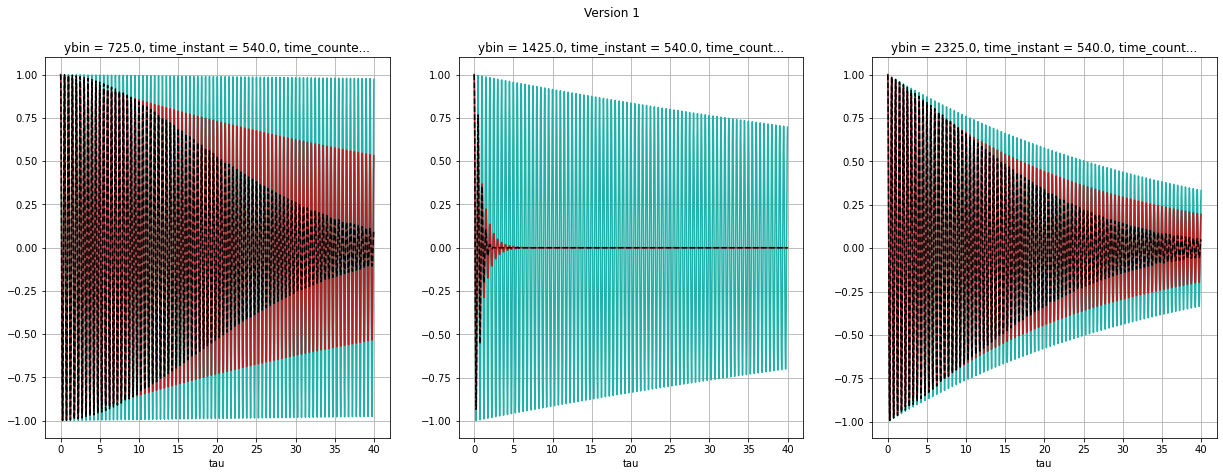

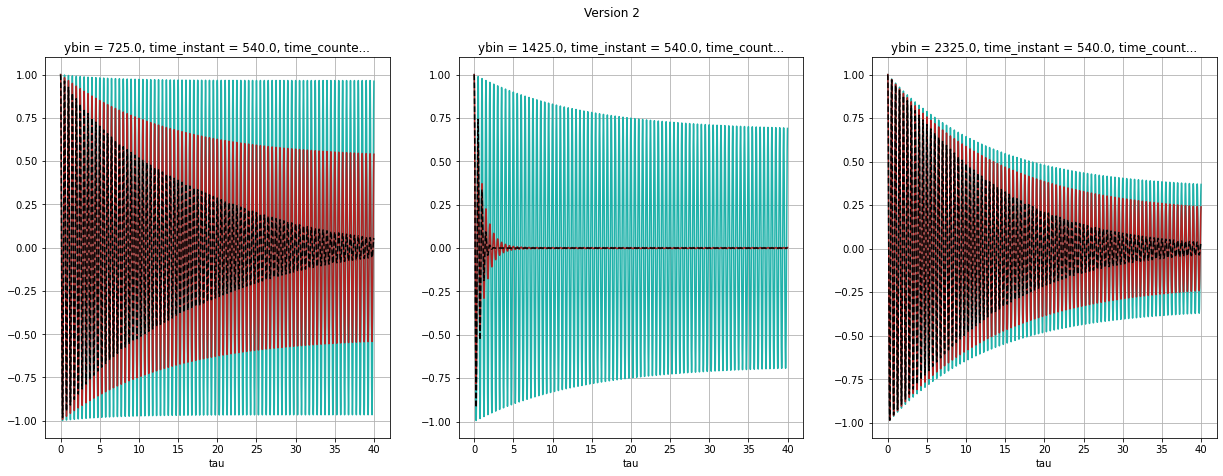

In [22]:
Y=[700,1425,2300]
i=-2
fig,axes=plt.subplots(1,3,figsize=(21,7))
for y,ax in zip(Y,axes):
    (fit_E_v1[i].sel(ybin=y,method='nearest')/fit_E_v1[i].sel(ybin=y,method='nearest').isel(tau=0)).plot(ax=ax,c=ce)
    (fit_L_v1[i].sel(ybin=y,method='nearest')/fit_L_v1[i].sel(ybin=y,method='nearest').isel(tau=0)).plot(ax=ax,c=cl)
    (th_v1[i].sel(ybin=y,method='nearest')/th_v1[i].sel(ybin=y,method='nearest').isel(tau=0)).plot(ax=ax,c='k',linestyle='--')
    ax.grid()
fig.suptitle('Version 1')

fig,axes=plt.subplots(1,3,figsize=(21,7))
for y,ax in zip(Y,axes):
    (fit_E_v2[i].sel(ybin=y,method='nearest')/fit_E_v2[i].sel(ybin=y,method='nearest').isel(tau=0)).plot(ax=ax,c=ce)
    (fit_L_v2[i].sel(ybin=y,method='nearest')/fit_L_v2[i].sel(ybin=y,method='nearest').isel(tau=0)).plot(ax=ax,c=cl)
    (th_v2[i].sel(ybin=y,method='nearest')/th_v2[i].sel(ybin=y,method='nearest').isel(tau=0)).plot(ax=ax,c='k',linestyle='--')
    ax.grid()
fig.suptitle('Version 2')

#### Envelopes

In [17]:
fit_env_E_v1 = [(fit_E_v1[i]/np.cos(omega*Tau)) for i in range(len(dsv1))]
fit_env_L_v1 = [(fit_L_v1[i]/np.cos(omega*Tau)) for i in range(len(dsv1))]
th_env_v1 = [(th_v1[i]/np.cos(omega*Tau)) for i in range(len(dsv1))]

fit_env_E_v2 = [(fit_E_v2[i]/np.cos(omega*Tau)) for i in range(len(dsv1))]
fit_env_L_v2 = [(fit_L_v2[i]/np.cos(omega*Tau)) for i in range(len(dsv1))]
th_env_v2 = [(th_v2[i]/np.cos(omega*Tau)) for i in range(len(dsv1))]

In [18]:
for i in range(len(dsv2)):
    if i!=2:
        fit_env_L_v1[i] = fit_env_L_v1[i].drop('time_instant') 
        fit_env_E_v1[i] = fit_env_E_v1[i].drop('time_instant') 
        th_env_v1[i] = th_env_v1[i].drop('time_instant') 
        fit_env_L_v2[i] = fit_env_L_v2[i].drop('time_instant') 
        fit_env_E_v2[i] = fit_env_E_v2[i].drop('time_instant') 
        th_env_v2[i] = th_env_v2[i].drop('time_instant') 
    if i==3:
      #  th_env_v1[i] = th_env_v1[i]/2
        fit_env_E_v1[i] = fit_env_E_v1[i]/2
  #      th_env_v2[i] = th_env_v2[i]/2
        fit_env_E_v2[i] = fit_env_E_v2[i]/2
        

In [19]:
fit_env_L_v1 = xr.concat(fit_env_L_v1,dim='wp')
fit_env_E_v1 = xr.concat(fit_env_E_v1,dim='wp')
th_env_v1 = xr.concat(th_env_v1,dim='wp')

fit_env_L_v2 = xr.concat(fit_env_L_v2,dim='wp')
fit_env_E_v2 = xr.concat(fit_env_E_v2,dim='wp')
th_env_v2 = xr.concat(th_env_v2,dim='wp')



In [20]:
C_env_v2 = xr.Dataset(data_vars = {'fit_L':fit_env_L_v2,'fit_E':fit_env_E_v2,'th_E':th_env_v2},coords={'tau':fit_env_E_v1.tau.values,'wp':np.arange(0,5),'ybin':fit_env_E_v1.ybin.values})
C_env_v1 = xr.Dataset(data_vars = {'fit_L':fit_env_L_v1,'fit_E':fit_env_E_v1,'th_E':th_env_v1},coords={'tau':fit_env_E_v1.tau.values,'wp':np.arange(0,5),'ybin':fit_env_E_v1.ybin.values})

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/plot/utils.py:583: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(primitive, **cbar_kwargs)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/plot/utils.py:583: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(primitive, **cbar_kwargs)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/plot/utils.py:583: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(primitive, **cbar_kwargs)
/opt/anaconda3/envs/croco/lib/pyth

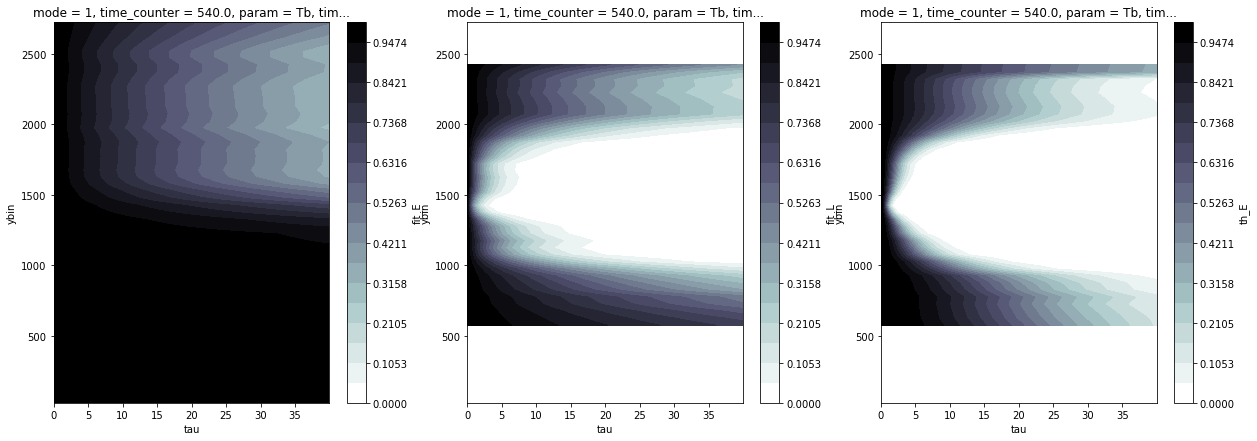

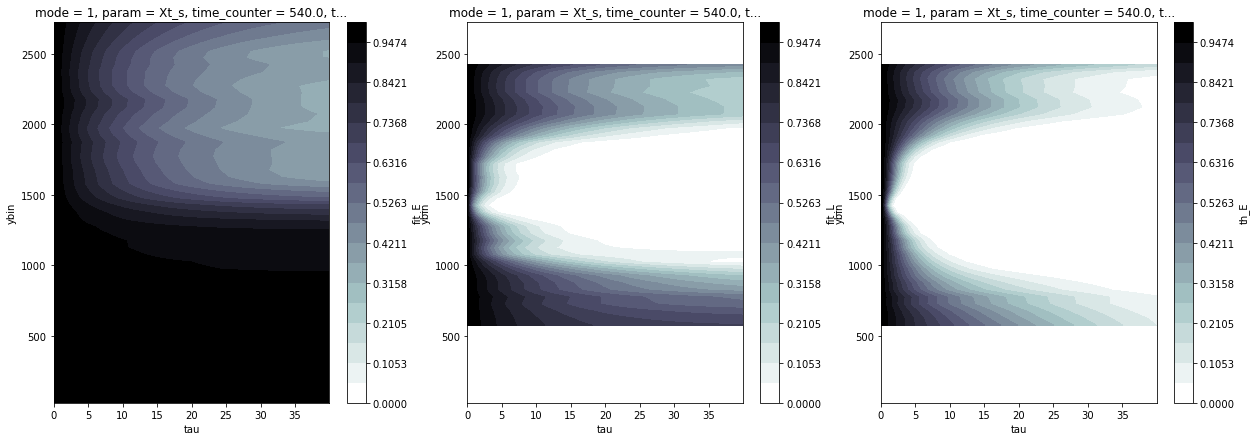

In [27]:
cmap='bone_r'
fig,ax = plt.subplots(1,3,figsize=(21,7))
(C_env_v1.fit_E.sel(wp=3)/C_env_v1.fit_E.sel(wp=3).isel(tau=0)).plot.contourf(ax=ax[0],cmap=cmap,levels=20,vmin=0,vmax=1)
(C_env_v1.fit_L.sel(wp=3)/C_env_v1.fit_L.sel(wp=3).isel(tau=0)).plot.contourf(ax=ax[1],cmap=cmap,levels=20,vmin=0,vmax=1)
(C_env_v1.th_E.sel(wp=3)/C_env_v1.th_E.sel(wp=3).isel(tau=0)).plot.contourf(ax=ax[2],cmap=cmap,levels=20,vmin=0,vmax=1)

fig,ax = plt.subplots(1,3,figsize=(21,7))
(C_env_v2.fit_E.sel(wp=3)/C_env_v2.fit_E.sel(wp=3).isel(tau=0)).plot.contourf(ax=ax[0],cmap=cmap,levels=20,vmin=0,vmax=1)
(C_env_v2.fit_L.sel(wp=3)/C_env_v2.fit_L.sel(wp=3).isel(tau=0)).plot.contourf(ax=ax[1],cmap=cmap,levels=20,vmin=0,vmax=1)
(C_env_v2.th_E.sel(wp=3)/C_env_v2.th_E.sel(wp=3).isel(tau=0)).plot.contourf(ax=ax[2],cmap=cmap,levels=20,vmin=0,vmax=1)

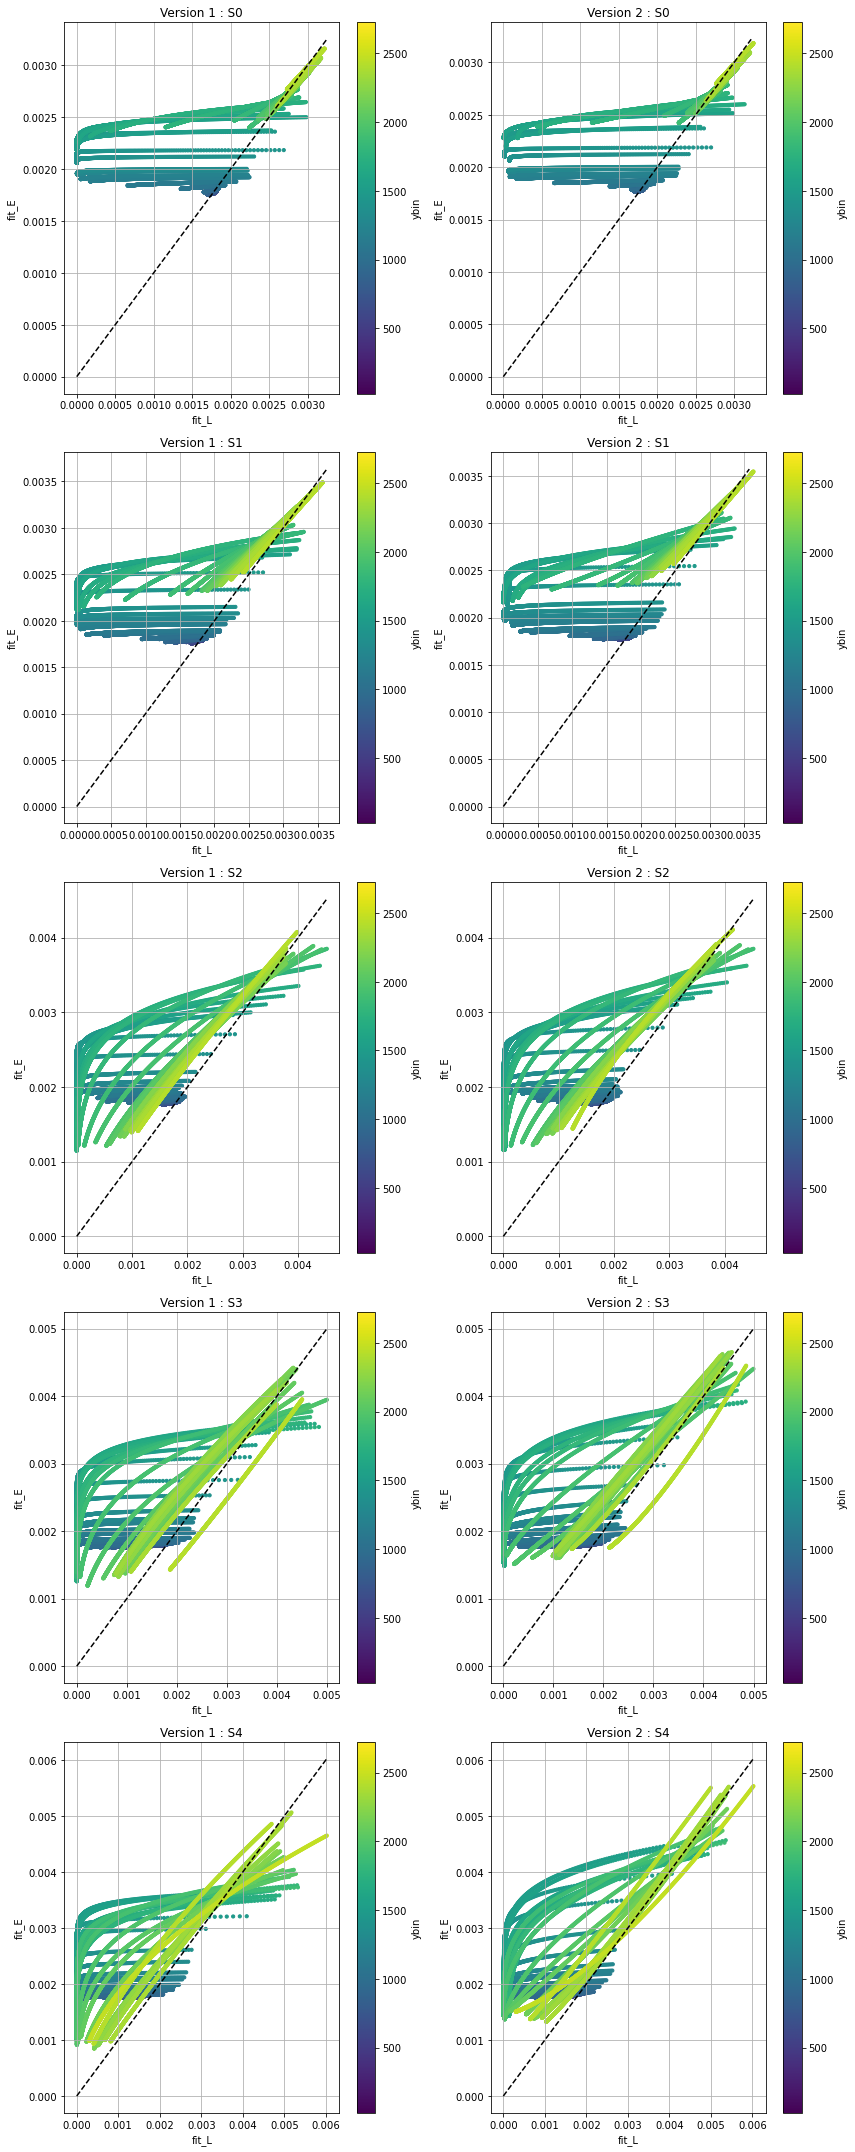

In [28]:
import seaborn as sns
fig,axs = plt.subplots(5,2,figsize=(12,30))


for i,S in enumerate(C_env_v1.wp.values):
    ax = axs[i,:]
    C_env_v2.sel(tau=slice(None,None,6),wp=S).plot.scatter(x='fit_L',y='fit_E',hue='ybin',s=10,ax=ax[1])
    x = np.linspace(0,C_env_v2.sel(tau=slice(None,None,6*12),wp=S).fit_L.max())
    ax[0].plot(x,x,'k--')
    ax[0].grid();ax[1].grid()
    C_env_v1.sel(tau=slice(None,None,6),wp=S).plot.scatter(x='fit_L',y='fit_E',hue='ybin',s=10,ax=ax[0])
    x = np.linspace(0,C_env_v1.sel(tau=slice(None,None,6*12),wp=S).fit_L.max())
    ax[1].plot(x,x,'k--');ax[0].set_title('Version 1 : S%s'%S);ax[1].set_title('Version 2 : S%s'%S)
fig.tight_layout()

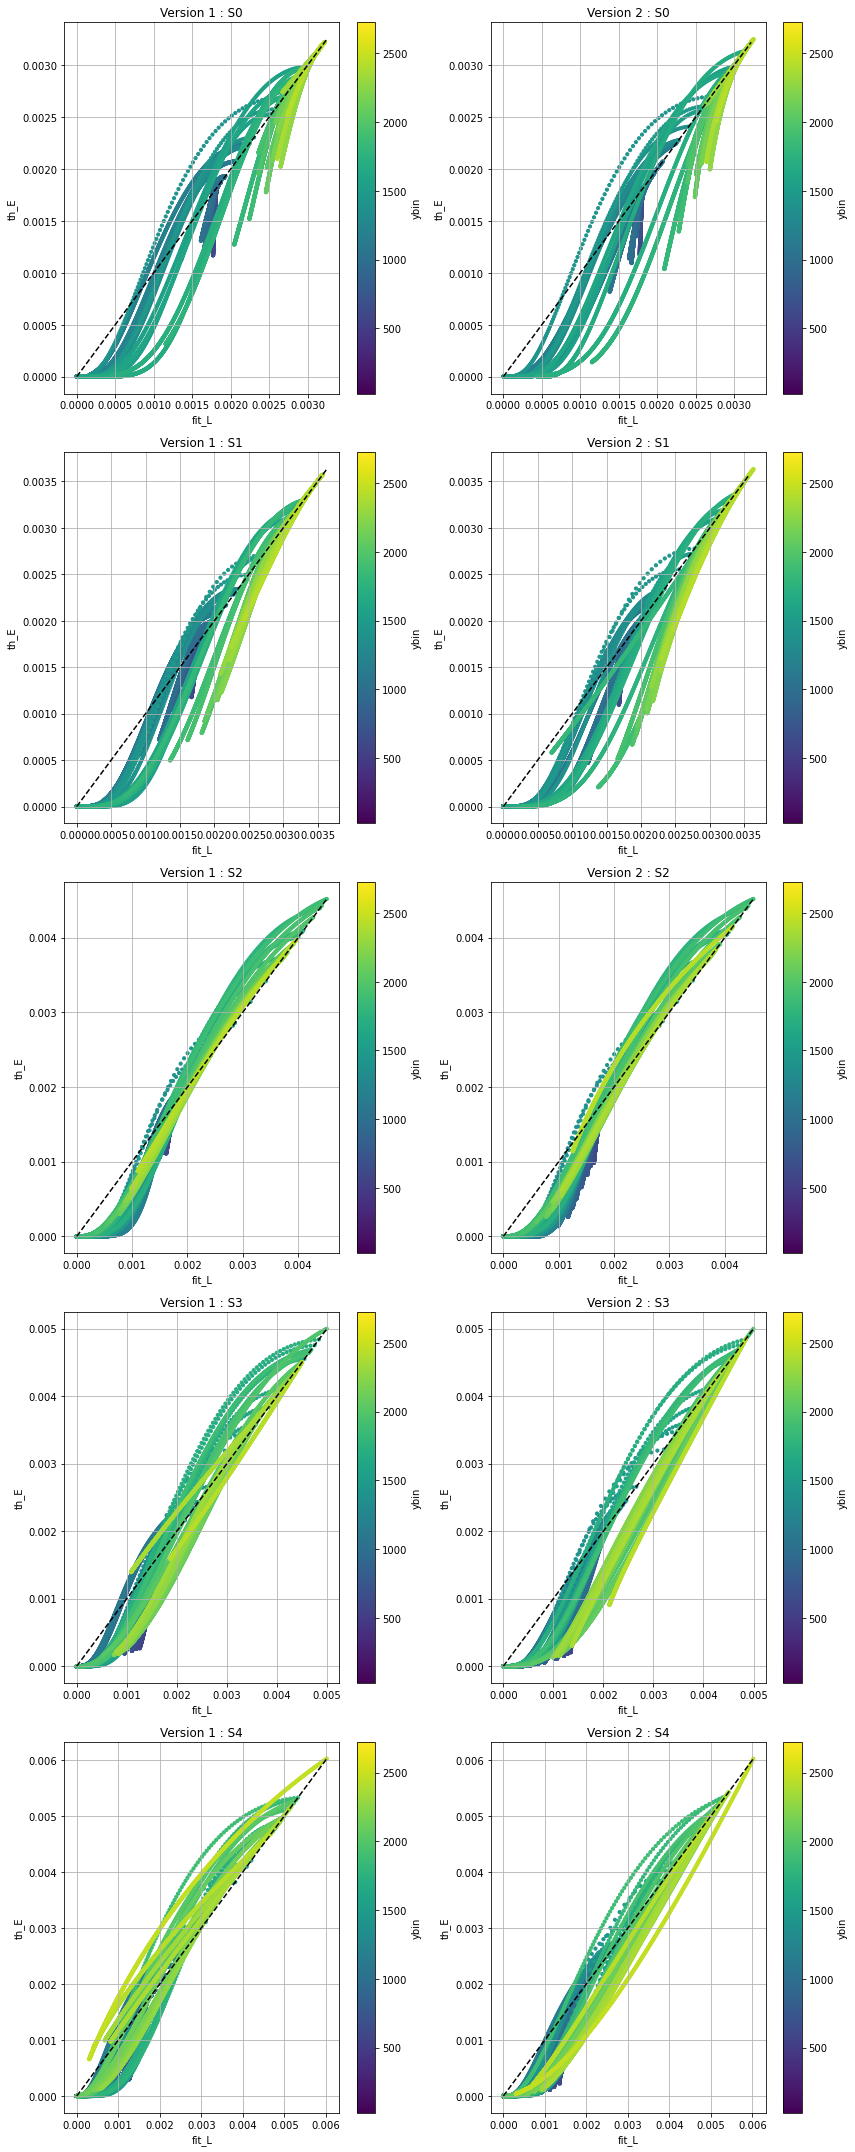

In [29]:
import seaborn as sns
fig,axs = plt.subplots(5,2,figsize=(12,30))


for i,S in enumerate(C_env_v1.wp.values):
    ax = axs[i,:]
    C_env_v2.sel(tau=slice(None,None,6),wp=S).plot.scatter(x='fit_L',y='th_E',hue='ybin',s=10,ax=ax[1])
    x = np.linspace(0,C_env_v2.sel(tau=slice(None,None,6*12),wp=S).fit_L.max())
    ax[0].plot(x,x,'k--')
    ax[0].grid();ax[1].grid()
    C_env_v1.sel(tau=slice(None,None,6),wp=S).plot.scatter(x='fit_L',y='th_E',hue='ybin',s=10,ax=ax[0])
    x = np.linspace(0,C_env_v1.sel(tau=slice(None,None,6*12),wp=S).fit_L.max())
    ax[1].plot(x,x,'k--');ax[0].set_title('Version 1 : S%s'%S);ax[1].set_title('Version 2 : S%s'%S)
fig.tight_layout()

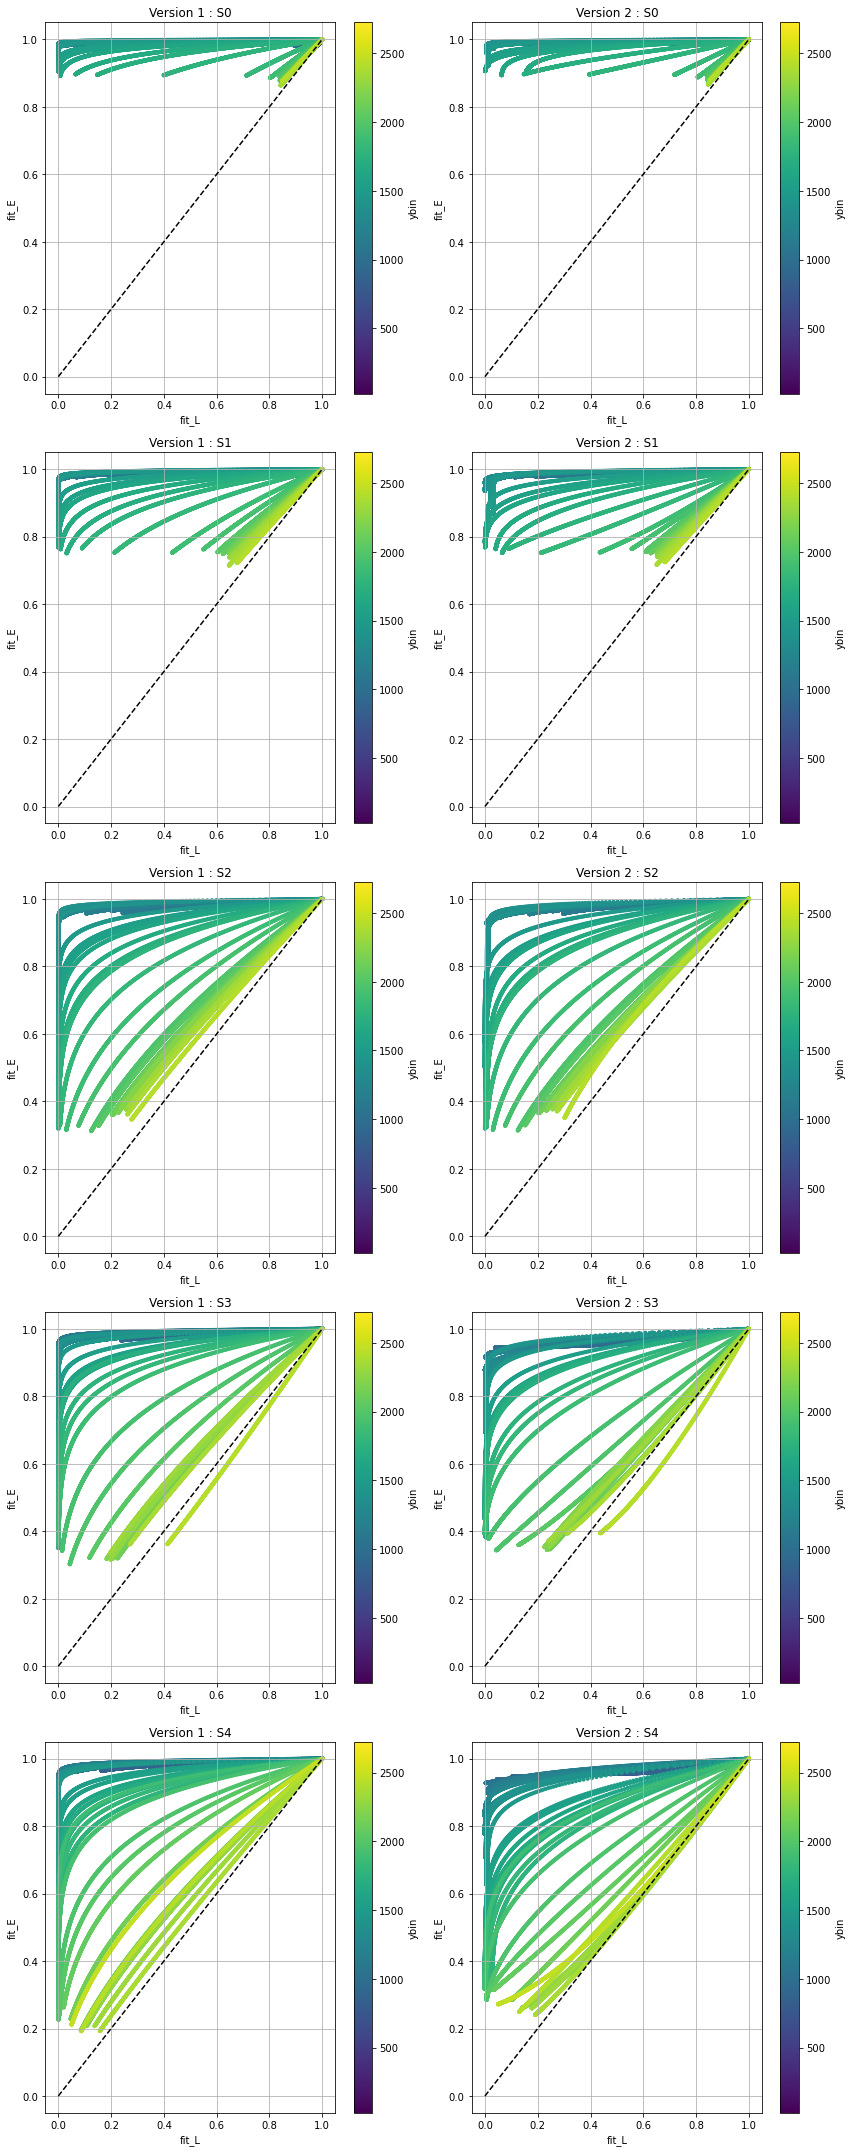

In [142]:
import seaborn as sns
fig,axs = plt.subplots(5,2,figsize=(12,30))


for i,S in enumerate(C_env_v1.wp.values):
    ax = axs[i,:]
    (C_env_v2.sel(tau=slice(None,None,6),wp=S)/C_env_v2.isel(tau=0).sel(wp=S)).plot.scatter(x='fit_L',y='fit_E',hue='ybin',s=10,ax=ax[1])
    x = np.linspace(0,1)
    ax[0].plot(x,x,'k--')
    ax[0].grid();ax[1].grid()
    (C_env_v1.sel(tau=slice(None,None,6),wp=S)/C_env_v1.isel(tau=0).sel(wp=S)).plot.scatter(x='fit_L',y='fit_E',hue='ybin',s=10,ax=ax[0])
    x = np.linspace(0,1)
    ax[1].plot(x,x,'k--');ax[0].set_title('Version 1 : S%s'%S);ax[1].set_title('Version 2 : S%s'%S)
fig.tight_layout()

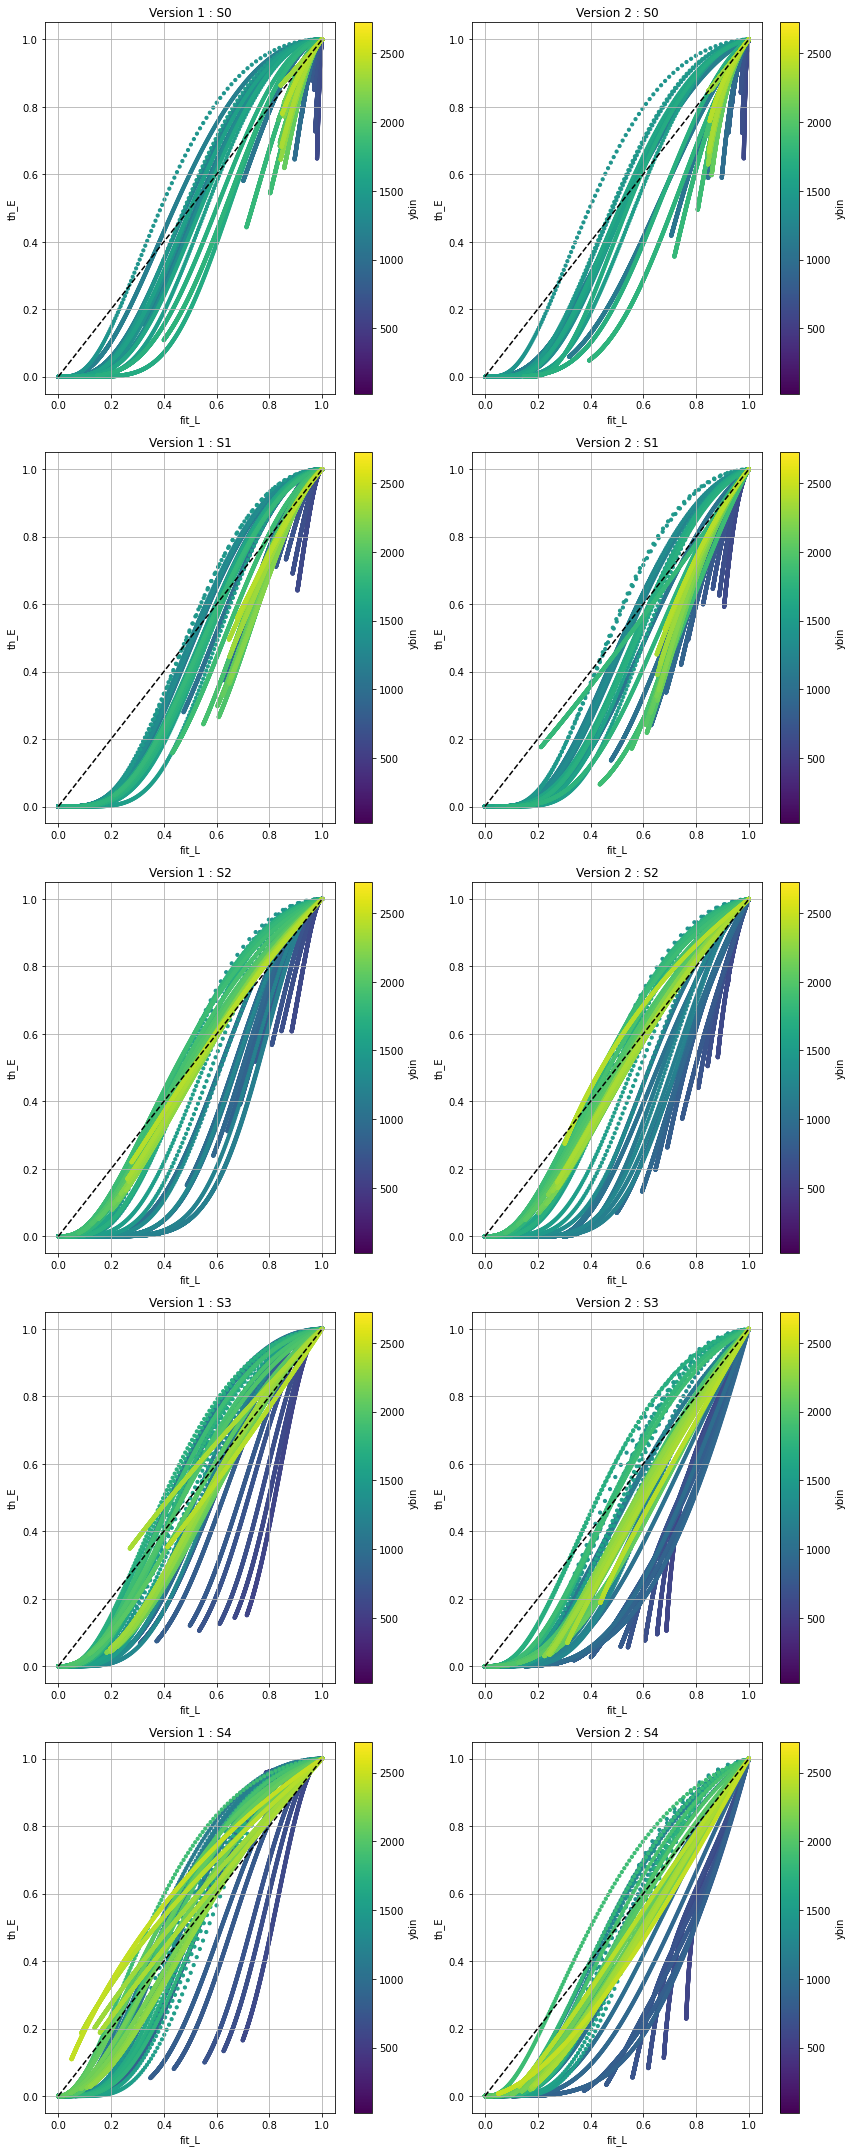

In [141]:
import seaborn as sns
fig,axs = plt.subplots(5,2,figsize=(12,30))


for i,S in enumerate(C_env_v1.wp.values):
    ax = axs[i,:]
    (C_env_v2.sel(tau=slice(None,None,6),wp=S)/C_env_v2.isel(tau=0).sel(wp=S)).plot.scatter(x='fit_L',y='th_E',hue='ybin',s=10,ax=ax[1])
    x = np.linspace(0,1)
    ax[0].plot(x,x,'k--')
    ax[0].grid();ax[1].grid()
    (C_env_v1.sel(tau=slice(None,None,6),wp=S)/C_env_v1.isel(tau=0).sel(wp=S)).plot.scatter(x='fit_L',y='th_E',hue='ybin',s=10,ax=ax[0])
    x = np.linspace(0,1)
    ax[1].plot(x,x,'k--');ax[0].set_title('Version 1 : S%s'%S);ax[1].set_title('Version 2 : S%s'%S)
fig.tight_layout()

### 2D Eulerian vs advection terms : 

In [21]:
V = '_v_avg'

In [22]:
r_E_v1 = [r_E(Tau,Te_v1[i]['E'+V]) for i,d in enumerate(dsv1)]
r1_adv_v1 = [r1_adv(Tau,Tbl_v1[i]['L'+V],np.sqrt(2*Xbl_v1[i]['L'+V])*3600*24) for i,d in enumerate(dsv1)]
r2_adv_v1 = [r2_adv(Tau,Tbl_v1[i]['L'+V],np.sqrt(2*Xbl_v1[i]['L'+V])*3600*24) for i,d in enumerate(dsv1)]
r_adv_v1 = [r_adv(Tau,Tbl_v1[i]['L'+V],np.sqrt(2*Xbl_v1[i]['L'+V])*3600*24) for i,d in enumerate(dsv1)]

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

In [23]:
r_E_v2 = [r_E(Tau,Te_v2[i]['E'+V]) for i,d in enumerate(dsv1)]
r1_adv_v2 = [r1_adv(Tau,Tbl_v2[i]['L'+V],np.sqrt(2*Xbl_v2[i]['L'+V])*3600*24) for i,d in enumerate(dsv1)]
r2_adv_v2 = [r2_adv(Tau,Tbl_v2[i]['L'+V],np.sqrt(2*Xbl_v2[i]['L'+V])*3600*24) for i,d in enumerate(dsv1)]
r_adv_v2 = [r_adv(Tau,Tbl_v2[i]['L'+V],np.sqrt(2*Xbl_v2[i]['L'+V])*3600*24) for i,d in enumerate(dsv1)]

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

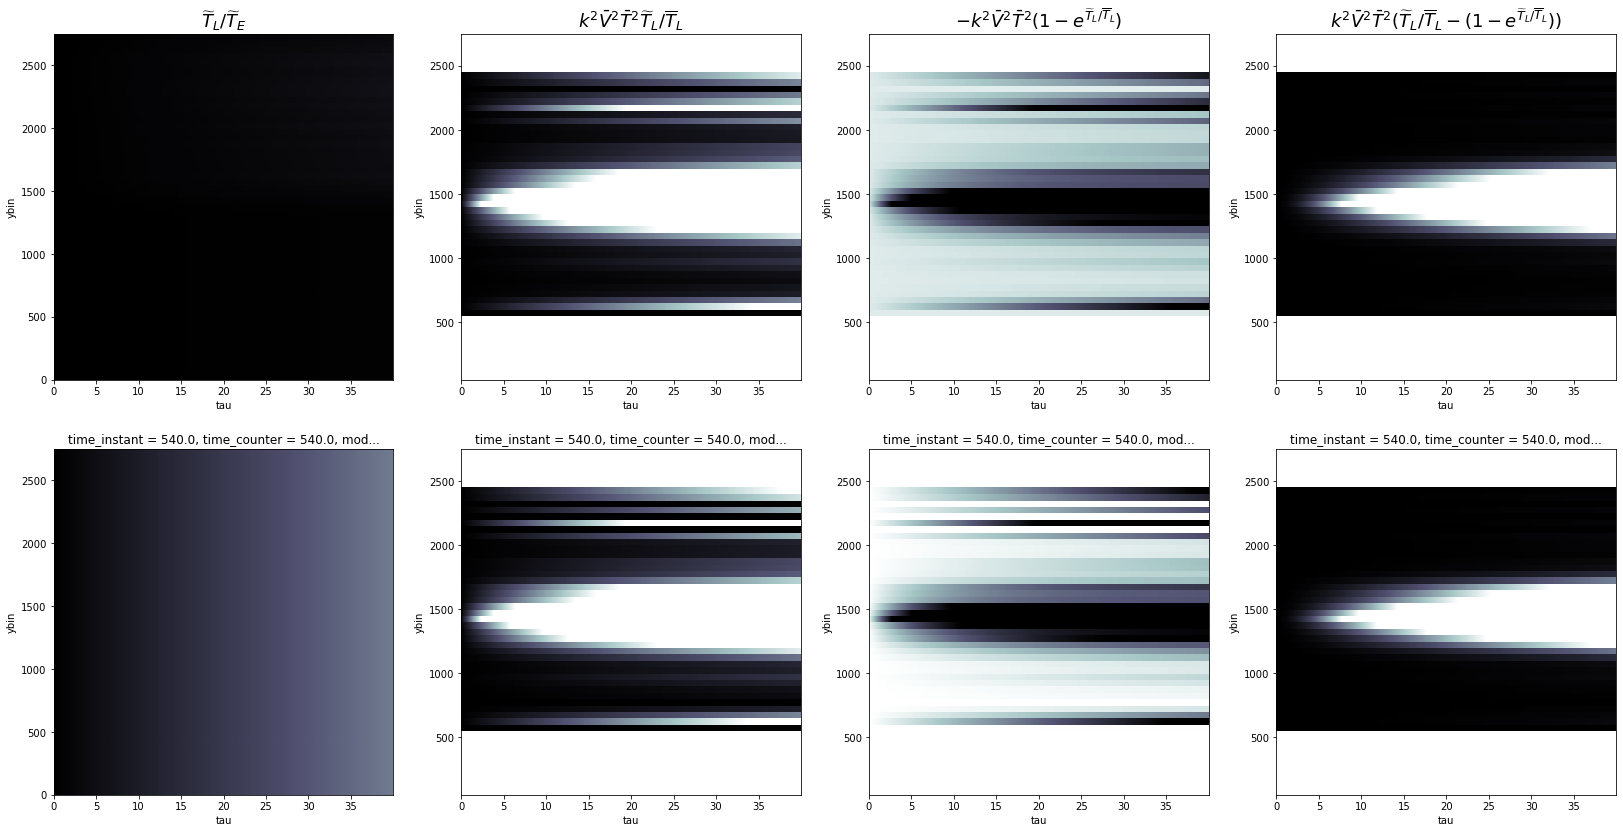

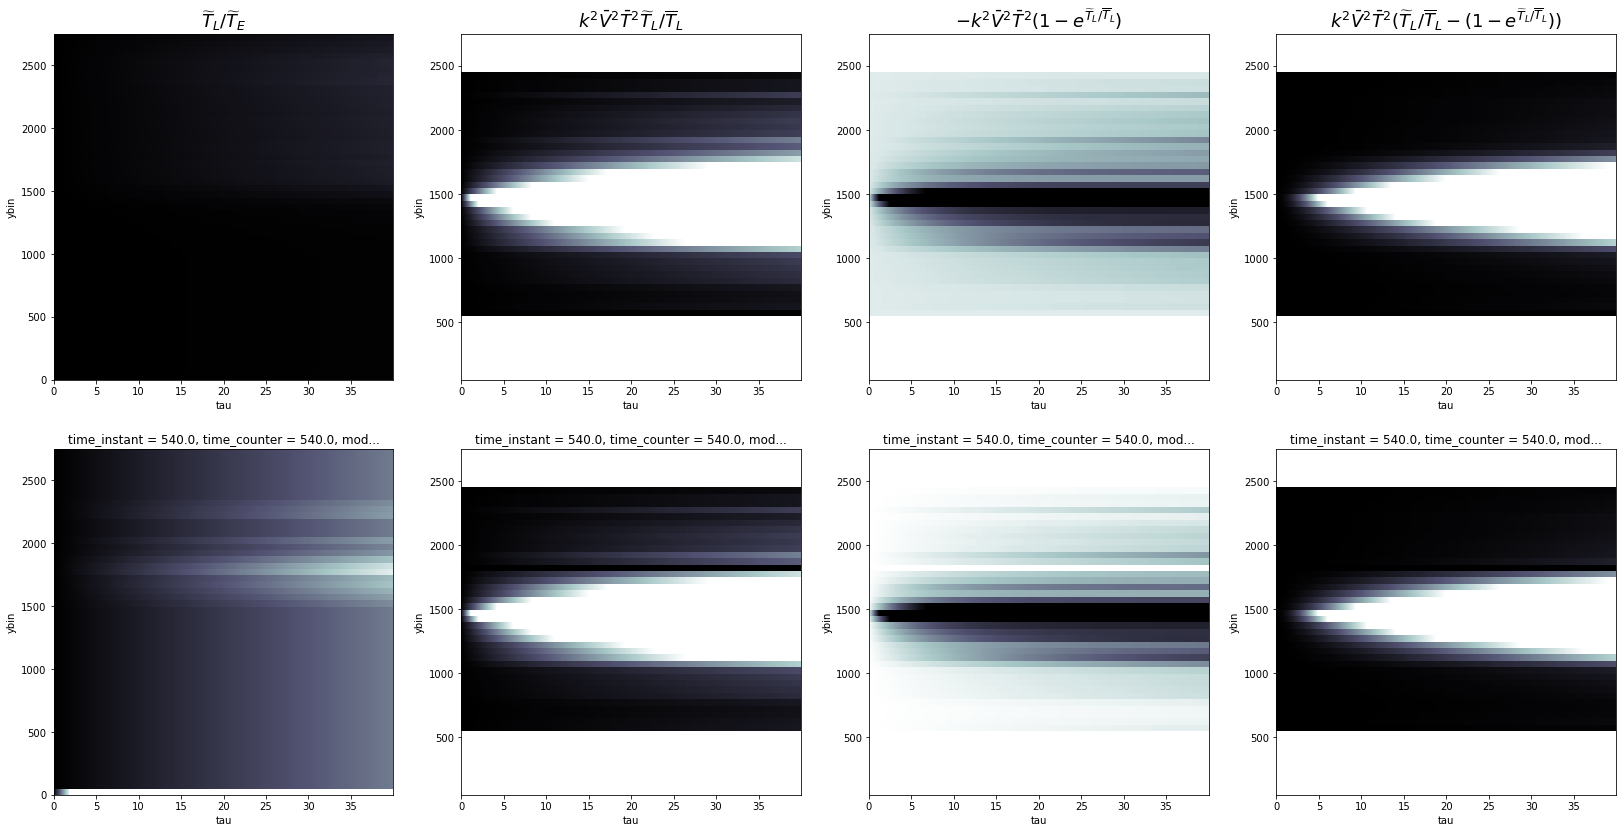

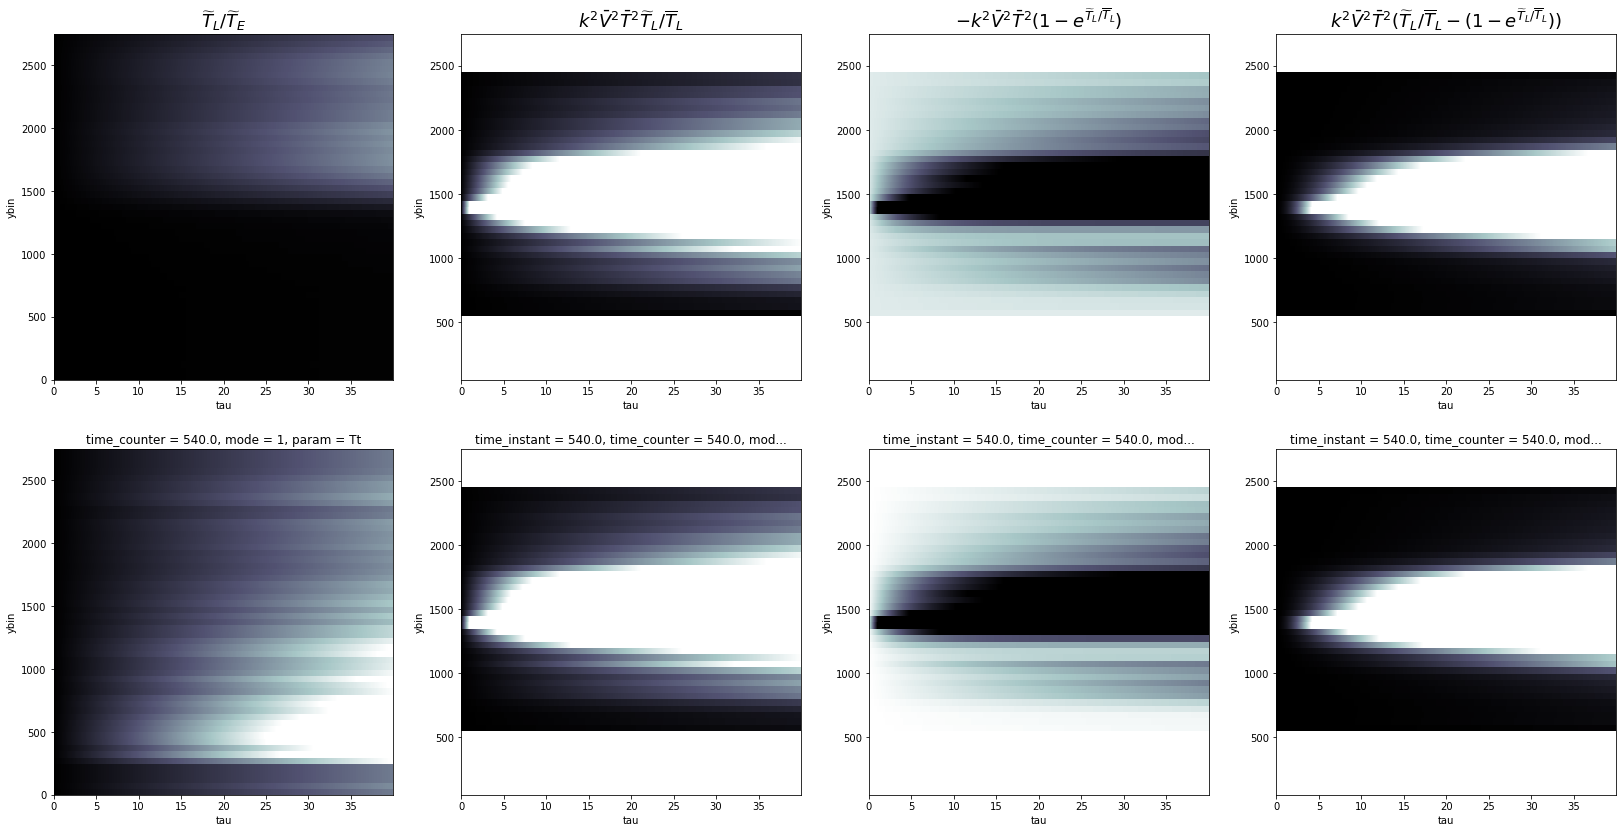

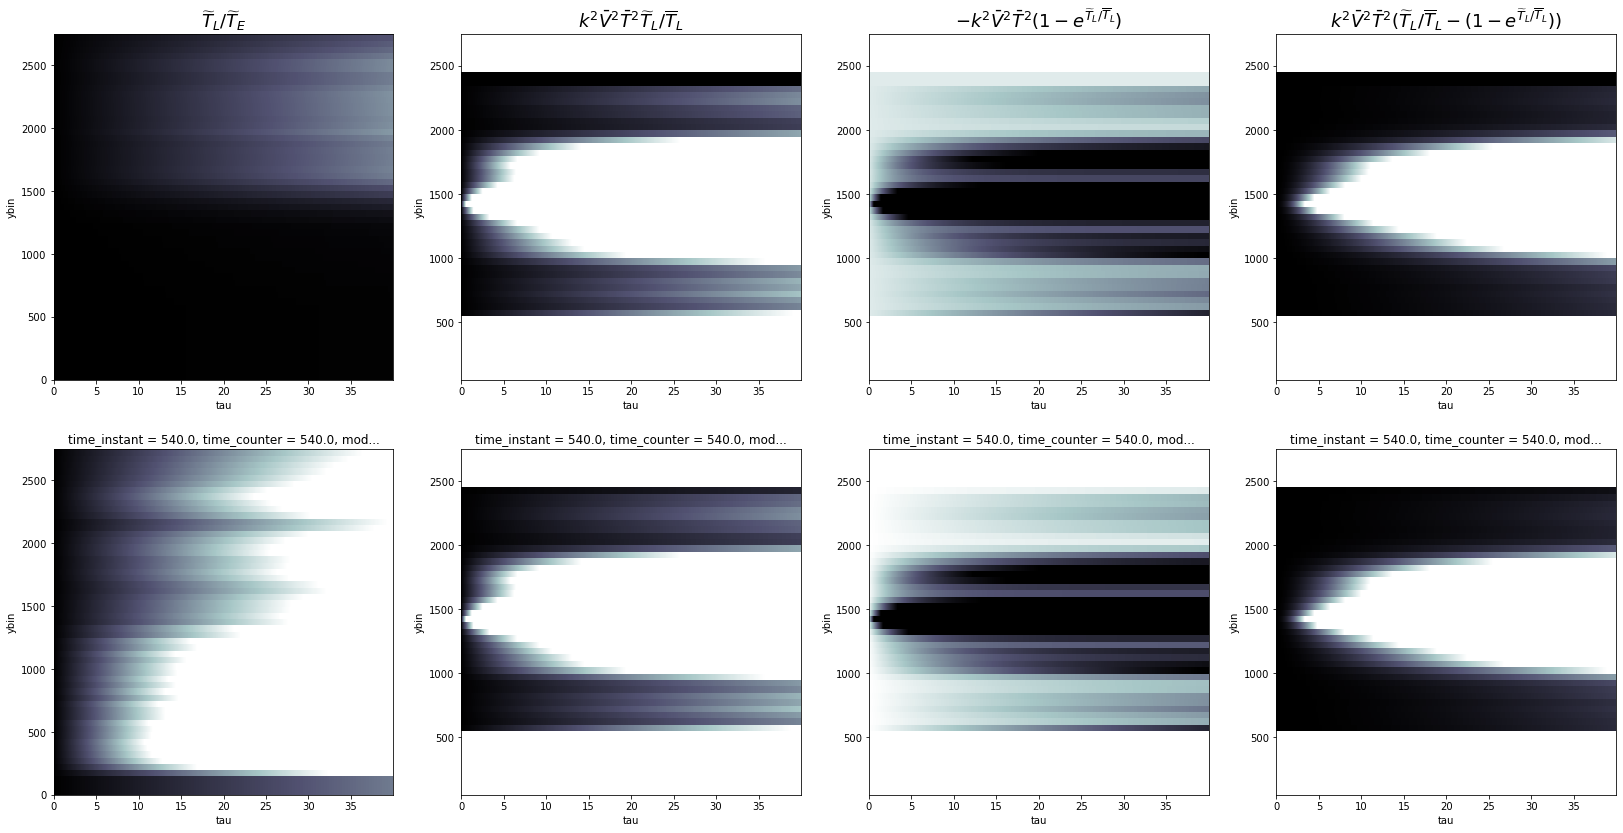

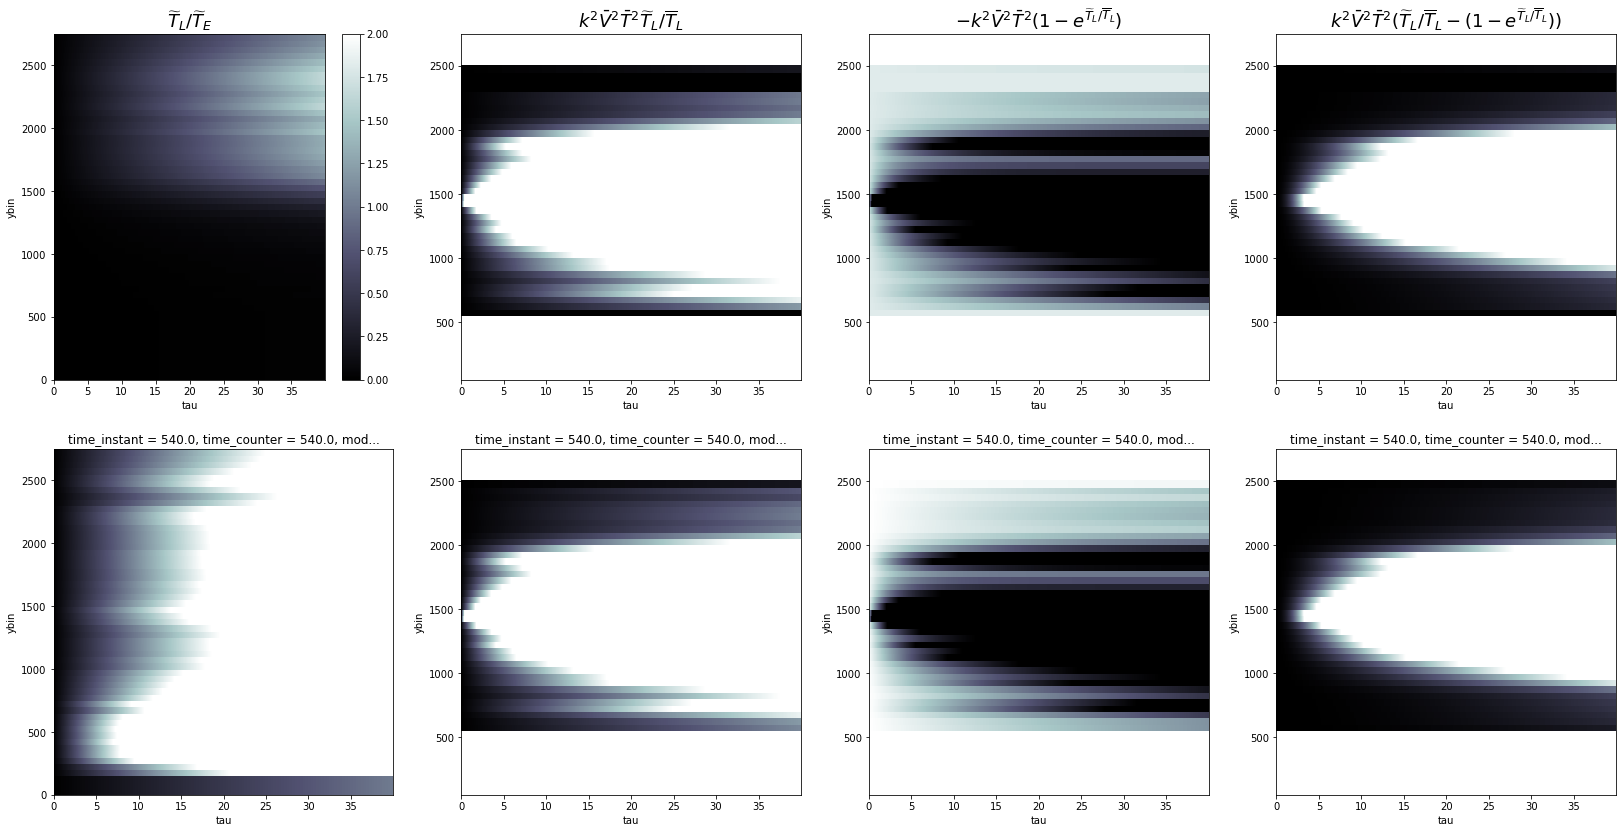

In [31]:
cmap='bone'
for i in range(len(dsv1)):
    fig,axes = plt.subplots(2,4,figsize=(28,14))
    cs_E = r_E_v1[i].plot(ax=axes[0,0],y='ybin',add_colorbar=False,cmap=cmap,vmin=0,vmax=2)
    r1_adv_v1[i].plot(ax=axes[0,1],y='ybin',add_colorbar=False,cmap=cmap,vmin=0,vmax=10)
    r2_adv_v1[i].plot(ax=axes[0,2],y='ybin',add_colorbar=False,cmap=cmap,vmin=-10,vmax=1)
    r_adv_v1[i].plot(ax=axes[0,3],y='ybin',add_colorbar=False,cmap=cmap,vmin=0,vmax=10)
    r_E_v2[i].plot(ax=axes[1,0],y='ybin',add_colorbar=False,cmap=cmap,vmin=0,vmax=2)
    r1_adv_v2[i].plot(ax=axes[1,1],y='ybin',add_colorbar=False,cmap=cmap,vmin=0,vmax=10)
    r2_adv_v2[i].plot(ax=axes[1,2],y='ybin',add_colorbar=False,cmap=cmap,vmin=-10,vmax=0)
    r_adv_v2[i].plot(ax=axes[1,3],y='ybin',add_colorbar=False,cmap=cmap,vmin=0,vmax=10)
    for ax,title in zip(axes[0,:],[r'$\widetilde{T}_L/\widetilde{T}_E$',r'$k^2\bar V^2\bar T^2\widetilde{T}_L/\overline{T}_L$',r'$-k^2\bar V^2\bar T^2(1-e^{\widetilde{T}_L/\overline{T}_L})$',r'$k^2\bar V^2\bar T^2(\widetilde{T}_L/\overline{T}_L-(1-e^{\widetilde{T}_L/\overline{T}_L}))$']):
    #ax.set_xlim(lim[0],lim[1])
        ax.set_title(title,fontsize=18);
plt.colorbar(cs_E,ax=axes[0,0])

### Eulerian and advection decorrelation terms at $\tau=\tilde T_L$

In [54]:
r_E_TL_v1 = [r_E(Tl_v1[i]['L'+V],Te_v1[i]['E'+V]) for i,d in enumerate(dsv1)]
r1_adv_TL_v1 = [r1_adv(Tl_v1[i]['L'+V],Tbl_v1[i]['L'+V],np.sqrt(2*Xbl_v1[i]['L'+V])*3600*24) for i,d in enumerate(dsv1)]
r2_adv_TL_v1 = [r2_adv(Tl_v1[i]['L'+V],Tbl_v1[i]['L'+V],np.sqrt(2*Xbl_v1[i]['L'+V])*3600*24) for i,d in enumerate(dsv1)]
r_adv_TL_v1 = [r_adv(Tl_v1[i]['L'+V],Tbl_v1[i]['L'+V],np.sqrt(2*Xbl_v1[i]['L'+V])*3600*24) for i,d in enumerate(dsv1)]

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

In [55]:
r_E_TL_v2 = [r_E(Tl_v2[i]['L'+V],Te_v2[i]['E'+V]) for i,d in enumerate(dsv1)]
r1_adv_TL_v2 = [r1_adv(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V],np.sqrt(2*Xbl_v2[i]['L'+V])*3600*24) for i,d in enumerate(dsv1)]
r2_adv_TL_v2 = [r2_adv(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V],np.sqrt(2*Xbl_v2[i]['L'+V])*3600*24) for i,d in enumerate(dsv1)]
r_adv_TL_v2 = [r_adv(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V],np.sqrt(2*Xbl_v2[i]['L'+V])*3600*24) for i,d in enumerate(dsv1)]

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

Text(0.5, 0.98, 'Version 2,v')

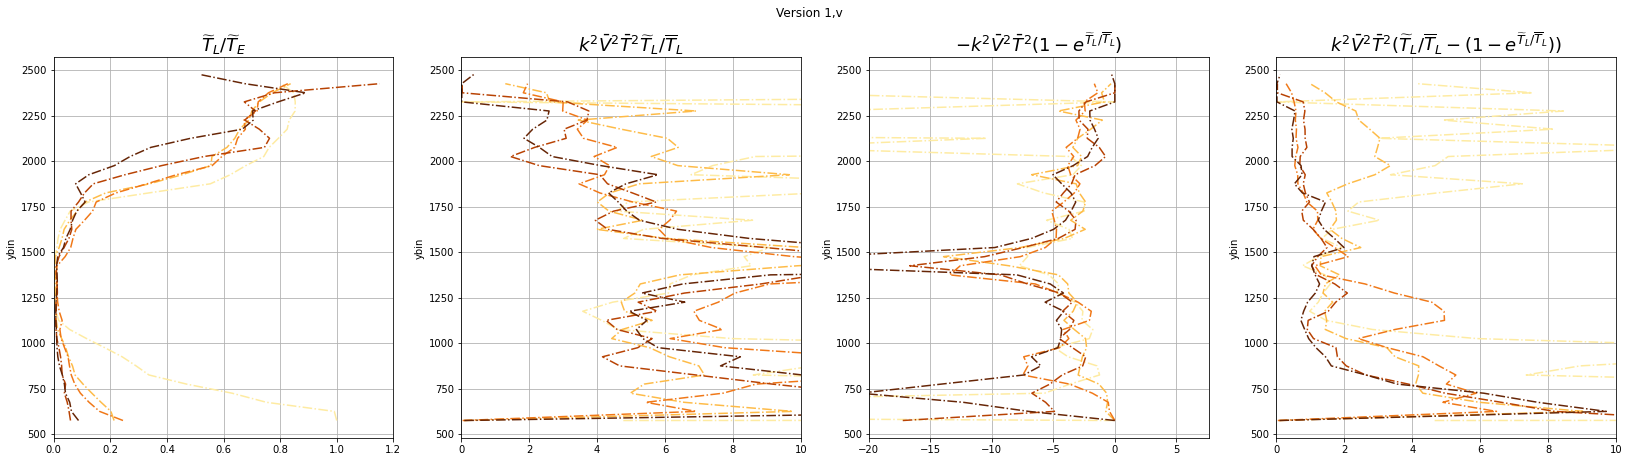

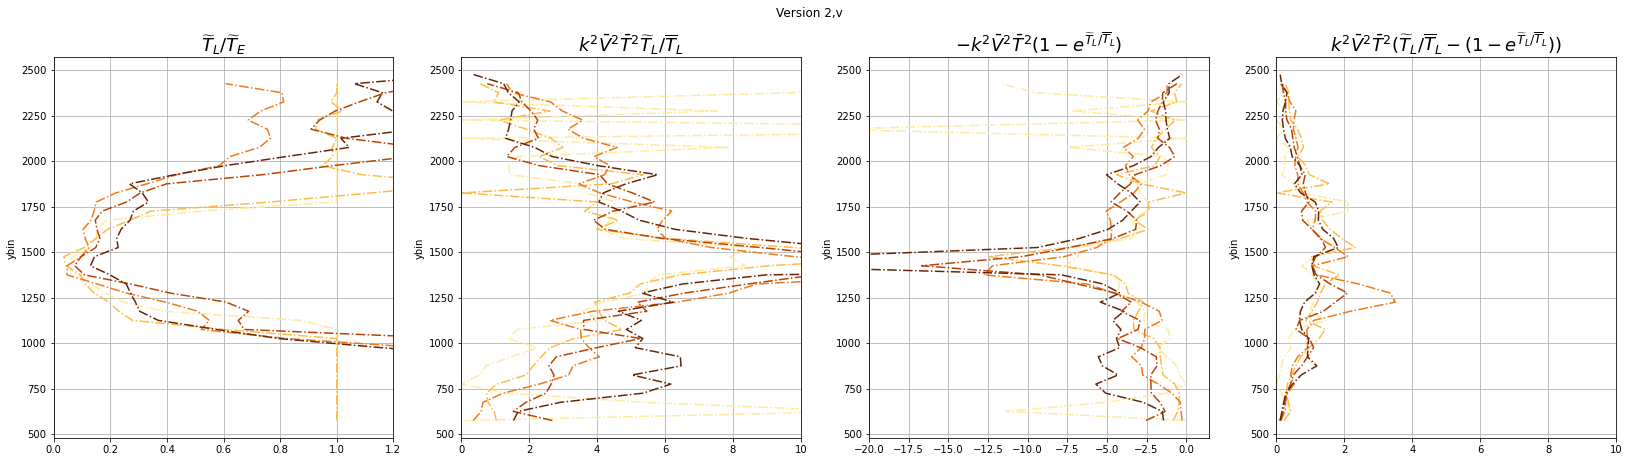

In [34]:

fig,axes = plt.subplots(1,4,figsize=(28,7))
for i,d in enumerate(dsv1):
    r_E_TL_v1[i].plot.line('-.',ax=axes[0],y='ybin',c=colors[i])
    r1_adv_TL_v1[i].plot.line('-.',ax=axes[1],y='ybin',c=colors[i])
    r2_adv_TL_v1[i].plot.line('-.',ax=axes[2],y='ybin',c=colors[i])
    r_adv_TL_v1[i].plot.line('-.',ax=axes[3],y='ybin',c=colors[i])
for ax,title,lim in zip(axes,[r'$\widetilde{T}_L/\widetilde{T}_E$',r'$k^2\bar V^2\bar T^2\widetilde{T}_L/\overline{T}_L$',r'$-k^2\bar V^2\bar T^2(1-e^{\widetilde{T}_L/\overline{T}_L})$',r'$k^2\bar V^2\bar T^2(\widetilde{T}_L/\overline{T}_L-(1-e^{\widetilde{T}_L/\overline{T}_L}))$'],[[0,1.2],[0,10],[-20,None],[0,10]]):
    ax.grid()
    ax.set_xlim(lim[0],lim[1])
    ax.set_title(title,fontsize=18);
fig.suptitle('Version 1,v')
#fig.savefig('/Users/zcaspar/Documents/Figures/Correlation_th/dominant_terms'+V[:2]+'_v1.pdf')

fig,axes = plt.subplots(1,4,figsize=(28,7))
for i,d in enumerate(dsv1):
    r_E_TL_v2[i].plot.line('-.',ax=axes[0],y='ybin',c=colors[i])
    r1_adv_TL_v2[i].plot.line('-.',ax=axes[1],y='ybin',c=colors[i])
    r2_adv_TL_v2[i].plot.line('-.',ax=axes[2],y='ybin',c=colors[i])
    r_adv_TL_v2[i].plot.line('-.',ax=axes[3],y='ybin',c=colors[i])
for ax,title,lim in zip(axes,[r'$\widetilde{T}_L/\widetilde{T}_E$',r'$k^2\bar V^2\bar T^2\widetilde{T}_L/\overline{T}_L$',r'$-k^2\bar V^2\bar T^2(1-e^{\widetilde{T}_L/\overline{T}_L})$',r'$k^2\bar V^2\bar T^2(\widetilde{T}_L/\overline{T}_L-(1-e^{\widetilde{T}_L/\overline{T}_L}))$'],[[0,1.2],[0,10],[-20,None],[0,10]]):
    ax.grid()
    ax.set_xlim(lim[0],lim[1])
    ax.set_title(title,fontsize=18);
fig.suptitle('Version 2,v')

Text(0.5, 0.98, 'Version 2')

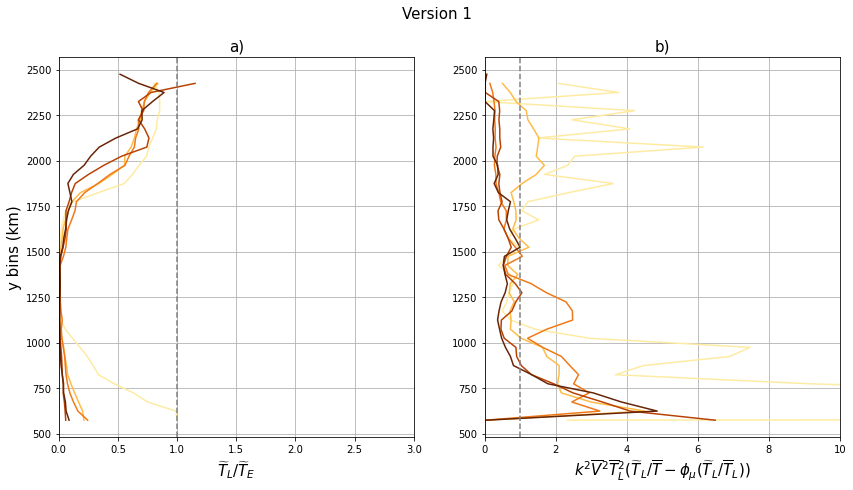

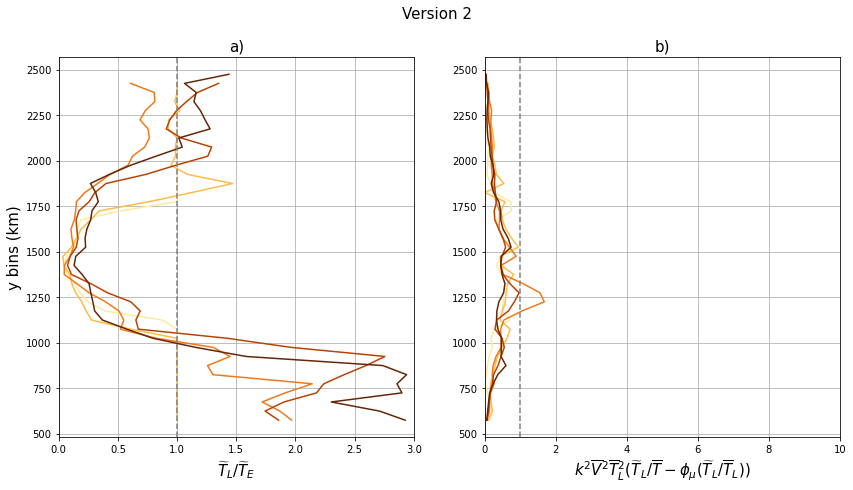

In [53]:
#Figure paper : 
size=15

fig,ax = plt.subplots(1,2,figsize=(14,7))
for i,d in enumerate(dsv2):
    x1 = r_E_TL_v1[i]
    x2 = r_adv_TL_v1[i]
    x1.plot.line('-',ax=ax[0],y='ybin',c=colors[i])
    x2.plot.line('-',ax=ax[1],y='ybin',c=colors[i])
ax[0].grid();ax[1].grid();
ax[0].axvline(1,c='grey',linestyle='--');ax[1].axvline(1,c='grey',linestyle='--')
ax[0].set_xlabel(r'$\widetilde{T}_L/\widetilde{T}_E$',fontsize=size);
ax[1].set_xlabel(r'$k^2\overline{V}^2\overline{T}_L^2(\widetilde{T}_L/\overline{T}-\phi_{\mu}(\widetilde{T}_L/\overline{T}_L))$',fontsize=size);
ax[0].set_ylabel('y bins (km)',fontsize=size);ax[1].set_ylabel('')
ax[0].set_title('a)',fontsize=size);ax[1].set_title('b)',fontsize=size)
ax[0].set_xlim(0,3);ax[1].set_xlim(0,10)


fig.suptitle('Version 1',fontsize=size)

fig,ax = plt.subplots(1,2,figsize=(14,7))
for i,d in enumerate(dsv2):
    x1 = r_E_TL_v2[i]
    x2 = r_adv_TL_v2[i]
    x1.plot.line('-',ax=ax[0],y='ybin',c=colors[i])
    x2.plot.line('-',ax=ax[1],y='ybin',c=colors[i])
ax[0].grid();ax[1].grid();
ax[0].axvline(1,c='grey',linestyle='--');ax[1].axvline(1,c='grey',linestyle='--')
ax[0].set_xlabel(r'$\widetilde{T}_L/\widetilde{T}_E$',fontsize=size);
ax[1].set_xlabel(r'$k^2\overline{V}^2\overline{T}_L^2(\widetilde{T}_L/\overline{T}-\phi_{\mu}(\widetilde{T}_L/\overline{T}_L))$',fontsize=size);
ax[0].set_ylabel('y bins (km)',fontsize=size);ax[1].set_ylabel('')
ax[0].set_title('a)',fontsize=size);ax[1].set_title('b)',fontsize=size)
ax[0].set_xlim(0,3);ax[1].set_xlim(0,10)
fig.suptitle('Version 2',fontsize=size)
    #fig.savefig('/Users/zcaspar/Documents/Figures/Correlation_th/t1t2'+V[:2]+'_v2.pdf')

#### Distribution

Text(0.5, 1.0, '$r_{adv}(\\tilde T_L)$, version 2')

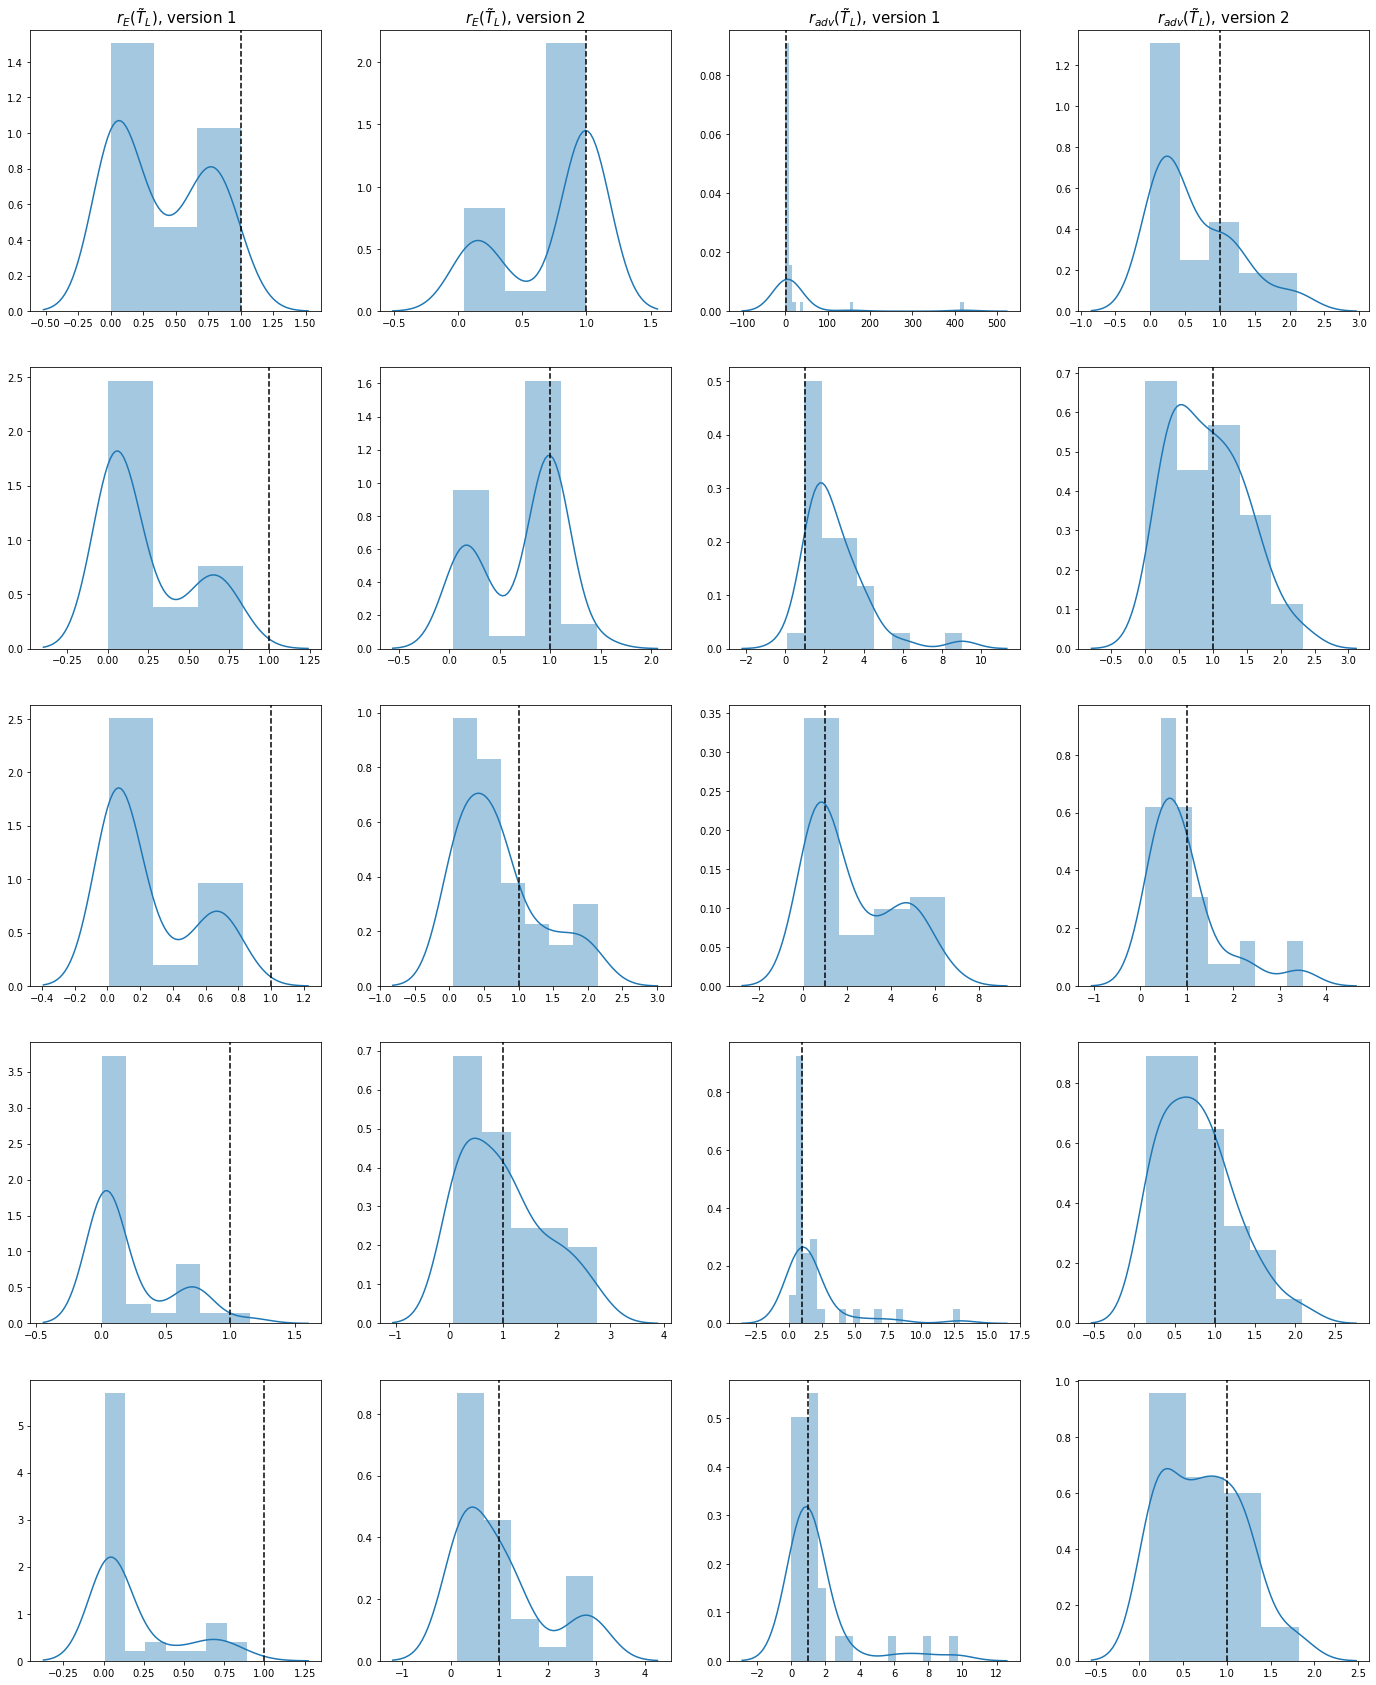

In [45]:
import seaborn as sns
fig,axes = plt.subplots(len(dsv1),4,figsize=(24,6*len(dsv1)))
for i,d in enumerate(dsv1):
    sns.distplot(r_E_TL_v1[i],ax=axes[i,0])
    sns.distplot(r_E_TL_v2[i],ax=axes[i,1])
    sns.distplot(r_adv_TL_v1[i],ax=axes[i,2])
    sns.distplot(r_adv_TL_v2[i],ax=axes[i,3])
    axes[i,0].axvline(1,c='k',linestyle='--');axes[i,1].axvline(1,c='k',linestyle='--');
    axes[i,2].axvline(1,c='k',linestyle='--');axes[i,3].axvline(1,c='k',linestyle='--')
axes[0,0].set_title(r'$r_E(\tilde T_L)$, version 1',fontsize=15)
axes[0,1].set_title(r'$r_E(\tilde T_L)$, version 2',fontsize=15)
axes[0,2].set_title(r'$r_{adv}(\tilde T_L)$, version 1',fontsize=15)
axes[0,3].set_title(r'$r_{adv}(\tilde T_L)$, version 2',fontsize=15)

In [57]:
rE_v1,rE_v2,radv_v1,radv_v2 = np.array([]),np.array([]),np.array([]),np.array([])

In [58]:
for i in range(len(dsv1)):
    rE_v1 = np.insert(rE_v1,0,r_E_TL_v1[i])
    rE_v2 = np.insert(rE_v2,0,r_E_TL_v2[i])
    radv_v1 = np.insert(rE_v1,0,r_adv_TL_v1[i])
    radv_v2 = np.insert(rE_v1,0,r_adv_TL_v2[i])

Text(0.5, 1.0, '$r_{adv}(\\tilde T_L)$, version 2')

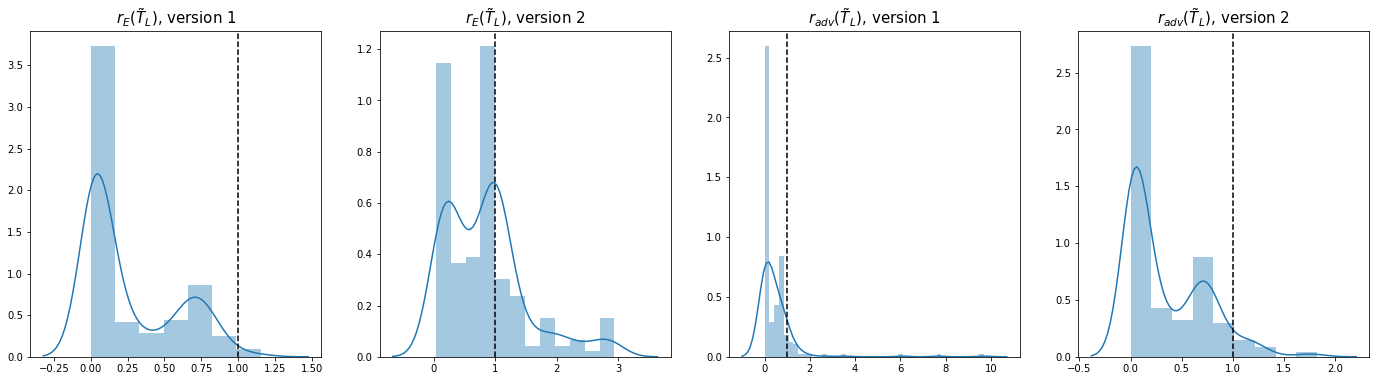

In [63]:
fig,axes = plt.subplots(1,4,figsize=(24,6))
sns.distplot(rE_v1,ax=axes[0]);sns.distplot(radv_v1,ax=axes[2]);
sns.distplot(rE_v2,ax=axes[1]);sns.distplot(radv_v2,ax=axes[3])
axes[0].axvline(1,c='k',linestyle='--');axes[1].axvline(1,c='k',linestyle='--');
axes[2].axvline(1,c='k',linestyle='--');axes[3].axvline(1,c='k',linestyle='--')
axes[0].set_title(r'$r_E(\tilde T_L)$, version 1',fontsize=15)
axes[1].set_title(r'$r_E(\tilde T_L)$, version 2',fontsize=15)
axes[2].set_title(r'$r_{adv}(\tilde T_L)$, version 1',fontsize=15)
axes[3].set_title(r'$r_{adv}(\tilde T_L)$, version 2',fontsize=15)

### Regimes model : 


In [24]:
V = '_v_avg'
r_adv_TE_v2 = [r_adv(Te_v2[i]['E'+V],Tbl_v2[i]['L'+V],np.sqrt(2*Xbl_v2[i]['L'+V])*3600*24) for i,d in enumerate(dsv2)]
ratio_ns = [d['E'+V].sel(param='Xt_s')/d['E'+V].sel(param='Xt_ns') for i,d in enumerate(dsv2)]
kvt = [2*np.pi/Ltilde_mean[i]*np.sqrt(2*Xbl_v2[i]['L'+V])*3600*24*Tbl_v2[i]['L'+V] for i, d in enumerate(dsv2)]

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

In [25]:
regimes = [xr.Dataset({'adv_Te':r_adv_TE_v2[i],'r_ns':np.sqrt(ratio_ns[i]),'kvt':kvt[i]}) for i in range(len(dsv2))]

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__or__ operat

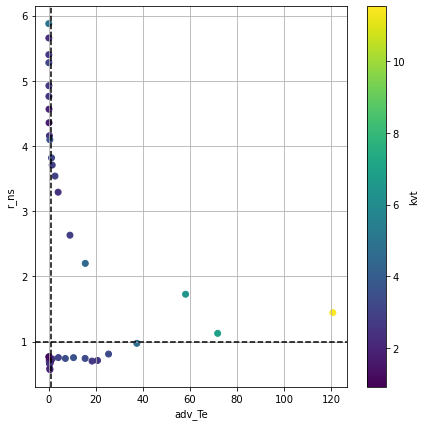

In [63]:
i=3
plt.figure(figsize=(7,7))
regimes[i].plot.scatter(x='adv_Te',y='r_ns',hue='kvt')
plt.grid()
plt.axvline(1,c='k',linestyle='--')
plt.axhline(1,c='k',linestyle='--')

### Partie stationnaire vs non-stationnaire (E et L)

In [39]:
i = -2
V = '_u_avg'
y = 700

Cs_sud = dsv2[i]['E'+V].sel(ybin=y,method='nearest').sel(param='Xt_s').values*np.exp(-t2(tau,Tbl_v2[i]['L'+V].sel(ybin=y,method='nearest').values,dsv2[i].Ta.sel(ybin=y,method='nearest').values)-t3(tau,Tbl_v2[i]['L'+V].sel(ybin=y,method='nearest').values,dsv2[i].Ta.sel(ybin=y,method='nearest').values))
Cns_sud = dsv2[i]['E'+V].sel(ybin=y,method='nearest').sel(param='Xt_ns').values*np.exp(-t1(tau,Te_v2[i]['E'+V].sel(ybin=y,method='nearest').values)-t2(tau,Tbl_v2[i]['L'+V].sel(ybin=y,method='nearest').values,dsv2[i].Ta_v.isel(s_rho=-1).sel(ybin=y,method='nearest').values)-t3(tau,Tbl_v2[i]['L'+V].sel(ybin=y,method='nearest').values,dsv2[i].Ta_v.isel(s_rho=-1).sel(ybin=y,method='nearest').values))

y = 1425
Cs_jet = dsv2[i]['E'+V].sel(ybin=y,method='nearest').sel(param='Xt_s').values*np.exp(-t2(tau,Tbl_v2[i]['L'+V].sel(ybin=y,method='nearest').values,dsv2[i].Ta_v.isel(s_rho=-1).sel(ybin=y,method='nearest').values)-t3(tau,Tbl_v2[i]['L'+V].sel(ybin=y,method='nearest').values,dsv2[i].Ta_v.isel(s_rho=-1).sel(ybin=y,method='nearest').values))
Cns_jet = dsv2[i]['E'+V].sel(ybin=y,method='nearest').sel(param='Xt_ns').values*np.exp(-t1(tau,Te_v2[i]['E'+V].sel(ybin=y,method='nearest').values)-t2(tau,Tbl_v2[i]['L'+V].sel(ybin=y,method='nearest').values,dsv2[i].Ta_v.isel(s_rho=-1).sel(ybin=y,method='nearest').values)-t3(tau,Tbl_v2[i]['L'+V].sel(ybin=y,method='nearest').values,dsv2[i].Ta_v.isel(s_rho=-1).sel(ybin=y,method='nearest').values))

y=2300
Cs_nord = dsv2[i]['E'+V].sel(ybin=y,method='nearest').sel(param='Xt_s').values*np.exp(-t2(tau,Tbl_v2[i]['L'+V].sel(ybin=y,method='nearest').values,dsv2[i].Ta_v.isel(s_rho=-1).sel(ybin=y,method='nearest').values)-t3(tau,Tbl_v2[i]['L'+V].sel(ybin=y,method='nearest').values,dsv2[i].Ta_v.isel(s_rho=-1).sel(ybin=y,method='nearest').values))
Cns_nord = dsv2[i]['E'+V].sel(ybin=y,method='nearest').sel(param='Xt_ns').values*np.exp(-t1(tau,Te_v2[i]['E'+V].sel(ybin=y,method='nearest').values)-t2(tau,Tbl_v2[i]['L'+V].sel(ybin=y,method='nearest').values,dsv2[i].Ta_v.isel(s_rho=-1).sel(ybin=y,method='nearest').values)-t3(tau,Tbl_v2[i]['L'+V].sel(ybin=y,method='nearest').values,dsv2[i].Ta_v.isel(s_rho=-1).sel(ybin=y,method='nearest').values))

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [48]:
def Cs(tau,Tb,Ta,Xt):
    return Xt*np.exp(-t2(tau,Tb,Ta)-t3(tau,Tb,Ta))
def Cns(tau,T,Tb,Ta,Xt):
    return Xt*np.exp(-t1(tau,T)-t2(tau,Tb,Ta)-t3(tau,Tb,Ta))

<xarray.DataArray 'E_u_avg' ()>
array(0.00281)
Coordinates:
    ybin          float64 725.0
    time_instant  float64 ...
    time_counter  float64 ...
    mode          int64 ...
    param         <U4 'Xt_s'

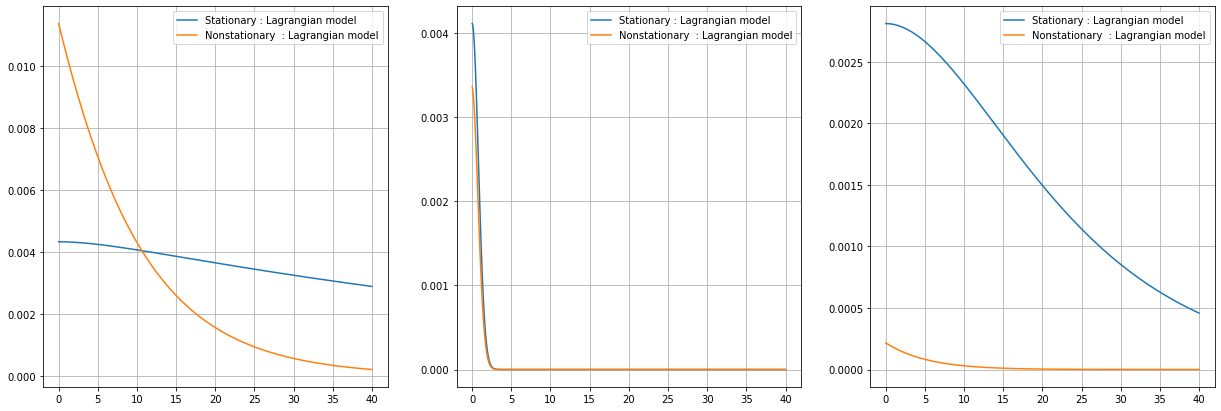

In [50]:
fig,axs = plt.subplots(1,3,figsize=(21,7))
for ax, C, y in zip(axs,[[Cs_nord,Cns_nord],[Cs_jet,Cns_jet],[Cs_sud,Cns_sud]],[2300,1425,700]):
    ax.plot(tau,C[0],label='Stationary : Lagrangian model')
    ax.plot(tau,C[1],label='Nonstationary  : Lagrangian model')
  #  dsv2[i]['E'+V].sel(ybin=y,method='nearest').sel(param='Xt_s').plot(ax=ax)
    ax.legend();ax.grid();#ax.set_ylim(0,0.01)

In [51]:
V = '_u_avg'
Cstat_E = Cs(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V],dsv2[i].Ta,dsv2[i]['E'+V].sel(param='Xt_s'))
Cnstat_E = Cns(Tl_v2[i]['L'+V],Te_v2[i]['E'+V],Tbl_v2[i]['L'+V],dsv2[i].Ta,dsv2[i]['E'+V].sel(param='Xt_ns'))

Cstat_L = Cs(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V],dsv2[i].Ta,dsv2[i]['L'+V].sel(param='Xt_s'))
Cnstat_L = Cns(Tl_v2[i]['L'+V],Te_v2[i]['E'+V],Tbl_v2[i]['L'+V],dsv2[i].Ta,dsv2[i]['L'+V].sel(param='Xt_ns'))

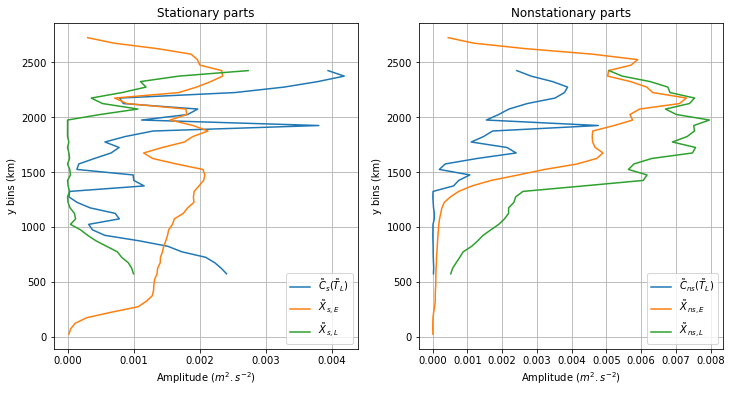

In [63]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
Cstat_E.plot(ax=ax[0],y='ybin',label=r'$\tilde C_{s}(\tilde T_L)$')
(dsv2[i]['E'+V].sel(param='Xt_s')/2).plot(ax=ax[0],y='ybin',label=r'$\tilde X_{s,E}$')
(dsv2[i]['L'+V].sel(param='Xt_s')).plot(ax=ax[0],y='ybin',label=r'$\tilde X_{s,L}$')
Cnstat_E.plot(ax=ax[1],y='ybin',label=r'$\tilde C_{ns}(\tilde T_L)$')
(dsv2[i]['E'+V].sel(param='Xt_ns')/2).plot(ax=ax[1],y='ybin',label=r'$\tilde X_{ns,E}$')
(dsv2[i]['L'+V].sel(param='Xt_ns')).plot(ax=ax[1],y='ybin',label=r'$\tilde X_{ns,L}$')

for a,title in zip(ax,['Stationary parts','Nonstationary parts']):
    a.grid();a.legend()
    a.set_title(title);a.set_xlabel(r'Amplitude ($m^2.s^{-2}$)');a.set_ylabel('y bins (km)')
fig.savefig('/Users/zcaspar/Documents/Figures/Correlation_th/stationaryvsNonstat_v2.pdf')

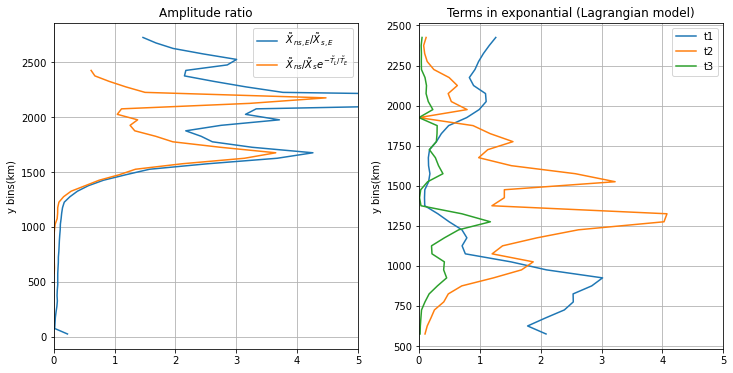

In [69]:
fig,ax = plt.subplots(1,2,figsize=(12,6))

(dsv2[i]['E'+V].sel(param='Xt_ns')/dsv2[i]['E'+V].sel(param='Xt_s')).plot(ax=ax[0],y='ybin',label=r'$\tilde X_{ns,E}/\tilde X_{s,E}$')
(dsv2[i]['E'+V].sel(param='Xt_ns')/dsv2[i]['E'+V].sel(param='Xt_s')*np.exp(-t1(Tl_v2[i]['L'+V],Te_v2[i]['E'+V]))).plot(ax=ax[0],y='ybin',label=r'$\tilde X_{ns}/\tilde X_s e^{-\tilde T_L/\tilde T_E}$')

t1(Tl_v2[i]['L'+V],Te_v2[i]['E'+V]).plot(ax=ax[1],y='ybin',label='t1')
t2(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V],dsv2[i].Ta).plot(ax=ax[1],y='ybin',label='t2')
t3(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V],dsv2[i].Ta).plot(ax=ax[1],y='ybin',label='t3')

for a,title in zip(ax,['Amplitude ratio','Terms in exponantial (Lagrangian model)']):
    a.legend();a.grid();a.set_xlim(0,5);a.set_ylabel('y bins(km)');a.set_title(title)
fig.savefig('/Users/zcaspar/Documents/Figures/Correlation_th/XnsXs_v2.pdf')

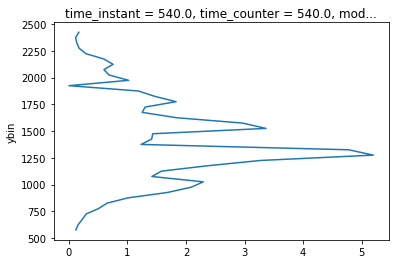

In [92]:
(t2(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V],dsv2[i].Ta)+t3(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V],dsv2[i].Ta)).plot(y='ybin')

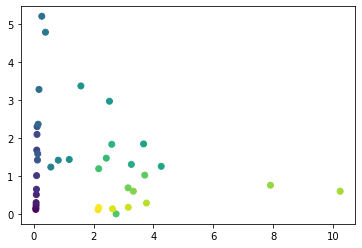

In [95]:
plt.scatter(dsv2[i]['E'+V].sel(param='Xt_ns')/dsv2[i]['E'+V].sel(param='Xt_s'),t2(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V],dsv2[i].Ta)+t3(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V],dsv2[i].Ta),c=dsv2[i].ybin.values)

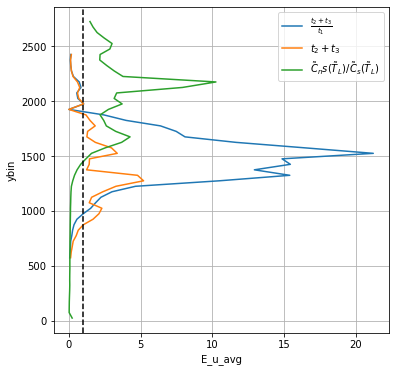

In [76]:
fig,ax = plt.subplots(figsize=(6,6))
((t2(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V],dsv2[i].Ta)+t3(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V],dsv2[i].Ta))/t1(Tl_v2[i]['L'+V],Te_v2[i]['E'+V])).plot(y='ybin',label=r'$\frac{t_2+t_3}{t_1}$')
((t2(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V],dsv2[i].Ta)+t3(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V],dsv2[i].Ta))).plot(y='ybin',label=r'$t_2+t_3$')


(dsv2[i]['E'+V].sel(param='Xt_ns')/dsv2[i]['E'+V].sel(param='Xt_s')).plot(y='ybin',label=r'$\tilde C_ns(\tilde T_L)/\tilde C_s(\tilde T_L)$')
plt.axvline(1,c='k',linestyle='--');plt.legend();plt.title('');plt.grid()
fig.savefig('/Users/zcaspar/Documents/Figures/Correlation_th/ratios_v2.pdf')

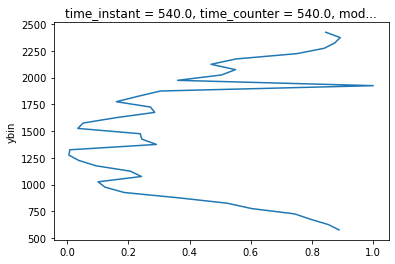

In [102]:
np.exp(-(t2(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V],dsv2[i].Ta)+t3(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V],dsv2[i].Ta))).plot(y='ybin')



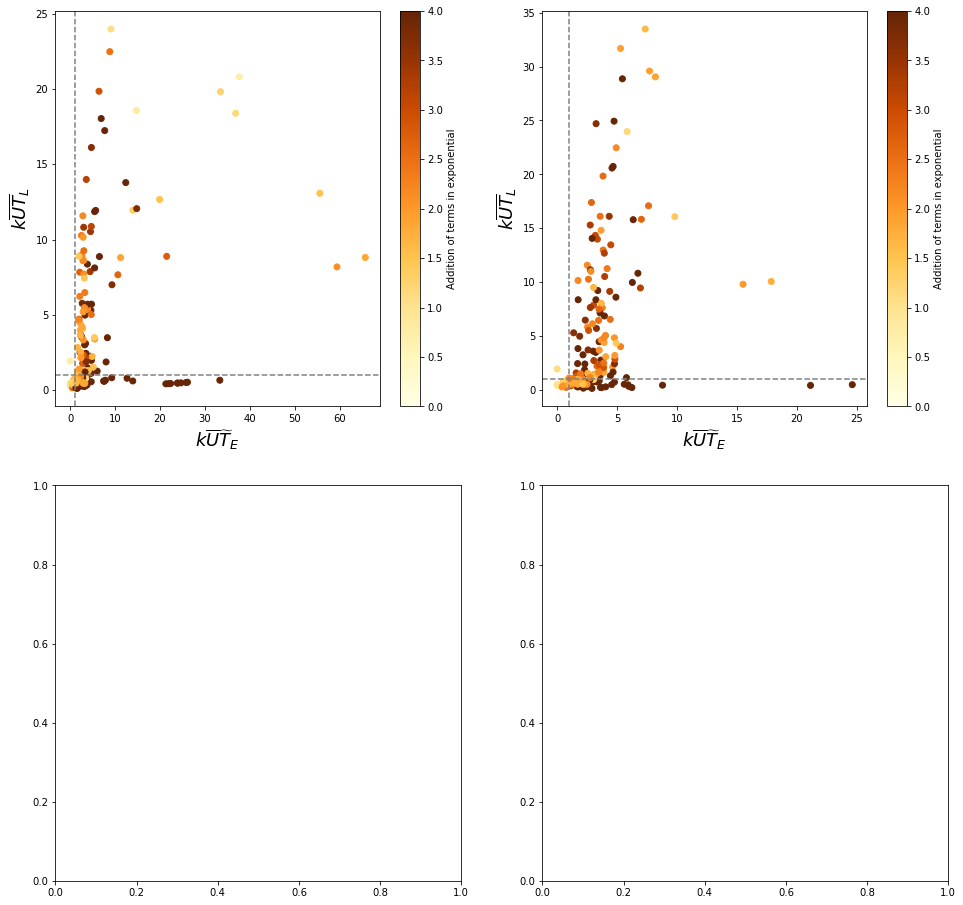

In [67]:
fig, axs = plt.subplots(2,2,figsize=(16,16))
for V, ax in zip(['_u_avg','_v_avg'],axs[0,:]):
    for i,d in enumerate(dsv2):
        t1 = Tl_v2[i]['L'+V]/Te_v2[i]['E'+V]
        t2 = Tbl_v2[i]['L'+V]**2*phi_mu(Tl_v1[i]['L'+V],Tbl_v2[i]['L'+V])**2*(2*np.pi/d.Ta)**2
        t3 = (2*np.pi/d.Ta)**2*Tl_v2[i]['L'+V]*Tbl_v2[i]['L'+V]*phi_sigma(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V])
        x1 = Te_v2[i]['E'+V]*2*np.pi/d.Ta
        x2 = Tbl_v2[i]['L'+V]*2*np.pi/d.Ta
        cs = ax.scatter(x2,x1,c=(t1+t2+t3).values,vmin=0,vmax=4,cmap=cmap)
    ax.axvline(1,c='grey',linestyle='--')
    ax.axhline(1,c='grey',linestyle='--')
    plt.colorbar(cs,ax=ax,label='Addition of terms in exponential')
    ax.set_xlabel(r'$k\overline{U}\widetilde{T}_E$',fontsize=18)
    ax.set_ylabel(r'$k\overline{U}\overline{T}_L$',fontsize=18)
